#**Explicação Teórica**


## Selecionar o sensor

Nesta etapa, um sensor específico é escolhido dentro do conjunto de dados para ser analisado. Esse sensor contém uma série temporal de medições ao longo do tempo. A seleção do sensor é fundamental, pois cada sensor pode ter características distintas de comportamento, ruído e sazonalidade, impactando a análise de anomalias.

##Decomposição do sinal nos componentes de tendência, sazonalidade e ruído

A decomposição sazonal é realizada utilizando o método seasonal_decompose da biblioteca statsmodels. Esse processo separa a série temporal em três componentes principais:

*  Tendência: Representa o comportamento de longo prazo da série, evidenciando se há crescimento ou declínio gradual.
*  Sazonalidade: Captura os padrões cíclicos que se repetem ao longo do tempo, como flutuações diárias, semanais ou mensais.
*  Ruído (residual): Contém as variações que não foram explicadas pela tendência ou sazonalidade, incluindo flutuações aleatórias e possíveis anomalias.

##Plotagem do sinal do sensor e os 3 componentes

Após a decomposição, os gráficos são gerados para visualizar cada um dos componentes. O sinal original do sensor é plotado juntamente com seus componentes de tendência, sazonalidade e ruído, permitindo uma análise detalhada do comportamento do sensor ao longo do tempo. A plotagem facilita a identificação de padrões, desvios significativos e potenciais anomalias.

##Verificação da sazonalidade em diferentes regiões do sinal

A sazonalidade da série é analisada em diferentes trechos da série temporal para verificar a consistência dos padrões sazonais. Isso é importante para entender se a periodicidade se mantém ao longo do tempo ou se há mudanças na frequência e amplitude da sazonalidade. A análise é feita dividindo o sinal em diferentes janelas temporais e gerando gráficos para cada região específica.

##Verificação do ruído

Diferente da sazonalidade, o ruído pode apresentar variações mais significativas ao longo do tempo. Enquanto a sazonalidade mantém um padrão consistente em relação ao sinal original, o ruído pode se tornar mais intenso ou disperso em algumas regiões, indicando momentos de instabilidade no sensor. A verificação do ruído é essencial para entender a presença de flutuações inesperadas que podem ser indicativas de falhas ou eventos atípicos.

##Aplicação do algoritmo para detectar anomalias usando a componente do ruído

Após a decomposição do sinal, o componente ruído é utilizado para detecção de anomalias. Como as anomalias costumam se manifestar como desvios inesperados na série temporal, a análise do ruído é ideal para capturar esses eventos. O algoritmo de detecção de anomalias por mediana dupla é aplicado diretamente sobre o ruído para identificar pontos que se desviam significativamente da norma esperada.

##Explicação do Algoritimo de Detecção de Anomalias por Mediana Dupla

O método double_absolute_median_anomaly_detection é baseado no cálculo da mediana dupla para identificar anomalias na série. O algoritmo segue os seguintes passos:

1. Cálculo da mediana da série → Determina o valor central dos dados, servindo
como referência para detectar desvios.
2. Cálculo do desvio absoluto da mediana (MAD - Median Absolute Deviation) → Mede quão distantes os pontos estão da mediana.
3. Cálculo da mediana dos desvios absolutos (segunda mediana) → Garante uma robustez adicional contra outliers extremos.
4. Cálculo do segundo desvio absoluto em relação à segunda mediana → Aperfeiçoa a normalização dos valores residuais.
5. Cálculo da pontuação de anomalia → O desvio é normalizado pelo segundo desvio absoluto para que valores extremos sejam evidenciados.
6. Classificação de anomalias → Se a pontuação for maior que um determinado limiar (threshold), o ponto é classificado como anômalo.

Esse método é extremamente robusto contra outliers e dados ruidosos, pois utiliza medianas em vez de médias, tornando-se menos sensível a variações extremas e permitindo detectar anomalias de forma confiável.

# **Análise do sensor 1**

##1. Carregar os dados do Arquivo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregar os dados
# link de onde o professor deixou o arquivo: https://github.com/thalesvalente/teaching/blob/main/data-mining-applied-to-engineering/3-resources/dataset_shrink_transformed.npz
file_path = 'dataset_shrink_transformed.npz' #Baixei direto do github do professor, talvez deveria botar o link para evitar ficar baixando? Por Enquanto, baixa e fica botando na pasta de arquivos -E
data = np.load(file_path)
arr_0 = data['arr_0']
arr_1 = data['arr_1']

# arr_1 contém as datas e arr_0 contém os dados dos sensores
dates = pd.to_datetime(arr_1)
sensor_data = pd.DataFrame(arr_0, index=dates)

##1.1 Selecionar o sensor

In [ ]:
# Selecionar os dados do Sensor 1
sensor = 1
sensor_index = sensor - 1

# Selecionar os dados do Sensor 1
sensor_data_sample = sensor_data.iloc[:, sensor_index]


##1.2 Decomposição do sinal nos  componentes de tendência, sazonalidade e ruído.

In [ ]:
# Decompor os dados do Sensor 1
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

##1.3 Plotagem do sinal do sensor  1 e os 3  componentes

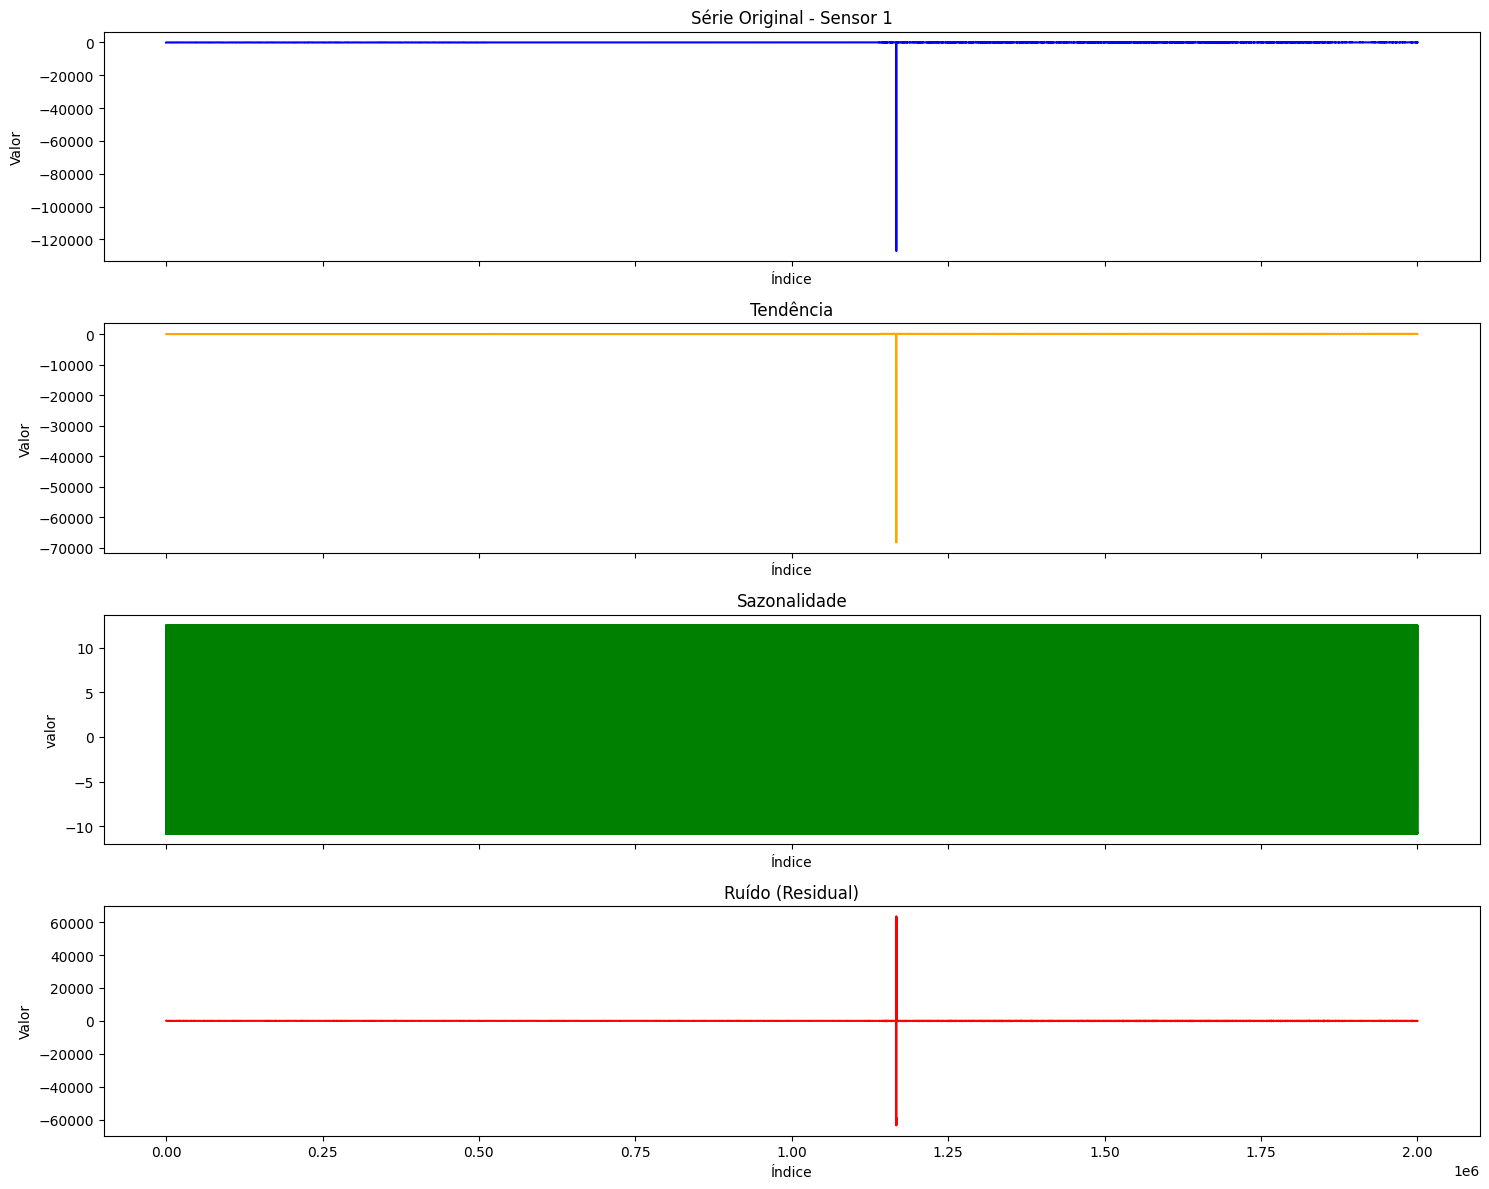

In [ ]:
# Selecionar os dados do Sensor 1
sensor = 1
sensor_index = sensor - 1

# Selecionar os dados do Sensor 1
sensor_data_sample = sensor_data.iloc[:, sensor_index]

# Decompor os dados do Sensor 1
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()


## 1.4 Verificação da sazonalidade em diferentes regiões do sinal

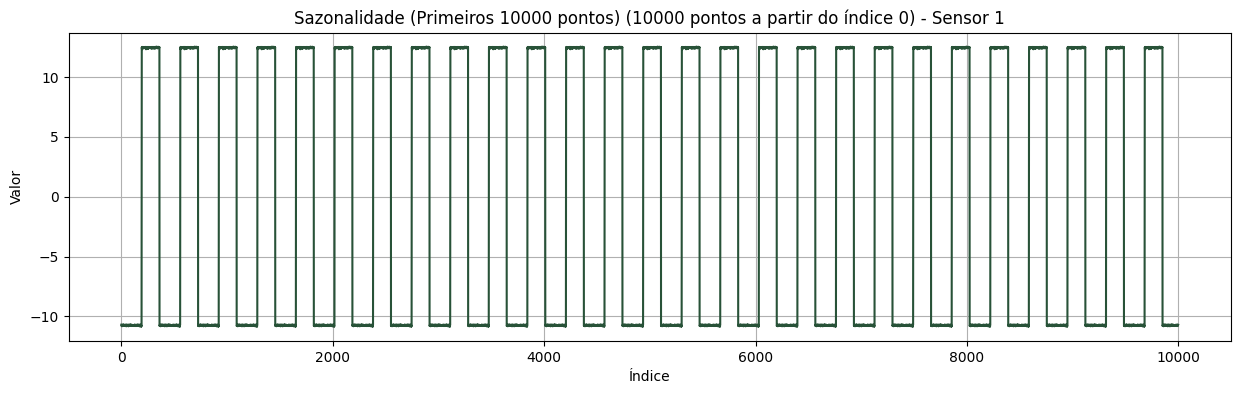

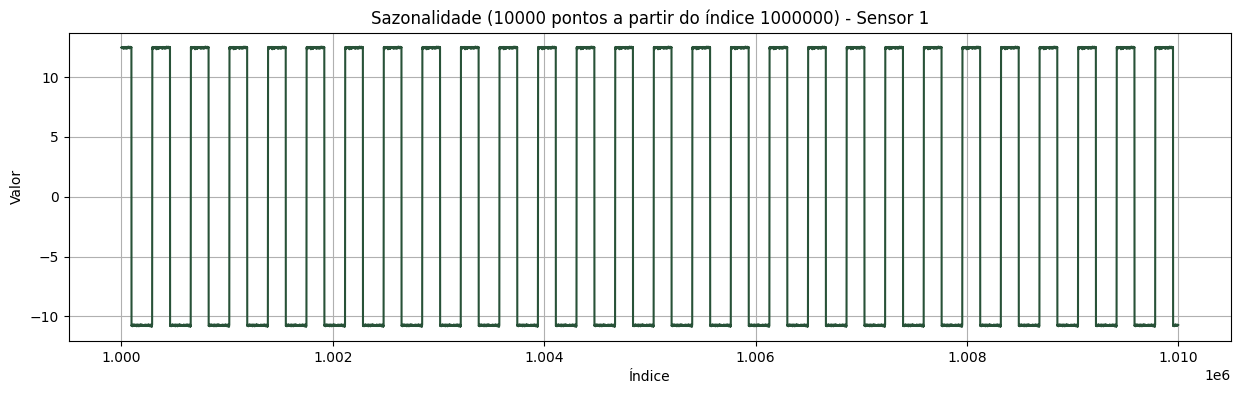

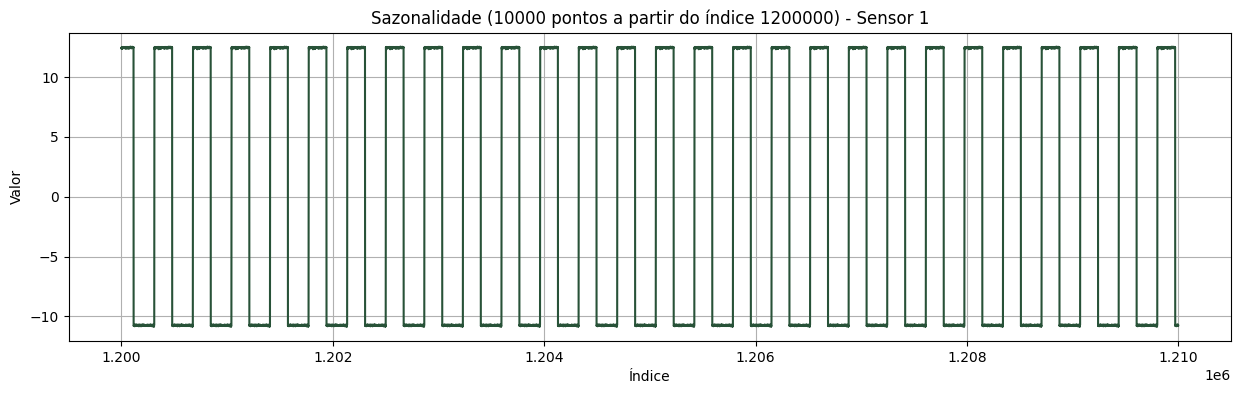

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar a sazonalidade em intervalos específicos
def plot_seasonality(result, indices, index_start, num_points, sensor, title_prefix="Sazonalidade"):
    """
    Função para plotar a série sazonal de uma decomposição temporal em um intervalo definido.

    Parâmetros:
        result (DecomposeResult): Objeto da decomposição sazonal contendo `seasonal`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para a plotagem.
        num_points (int): Número de pontos a serem exibidos.
        sensor (int/str): Identificador do sensor (exibido no título).
        title_prefix (str): Prefixo do título do gráfico (ex: 'Sazonalidade').
    """
    # Definir índice final com base no número de pontos
    index_end = index_start + num_points

    # Garantir que o índice final não ultrapasse os dados disponíveis
    max_index = len(indices)
    if index_end > max_index:
        print(f"Índice final ajustado de {index_end} para {max_index} (limite dos dados).")
        index_end = max_index

    # Criar gráfico para o intervalo solicitado
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.seasonal[index_start:index_end], color='#285238', label='Sazonalidade')
    plt.title(f"{title_prefix} ({num_points} pontos a partir do índice {index_start}) - Sensor {sensor}")
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.grid(True)  # Adicionar grade ao gráfico
    plt.show()

# Plotando os intervalos especificados
plot_seasonality(
    result=result,
    indices=indices,
    index_start=0,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade (Primeiros 10000 pontos)"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1000000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1200000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)



## 1.5   Verificação do ruído. Enquanto a sazonalidade parece manter o mesmo padrão da série original, O ruído demonstra alteração

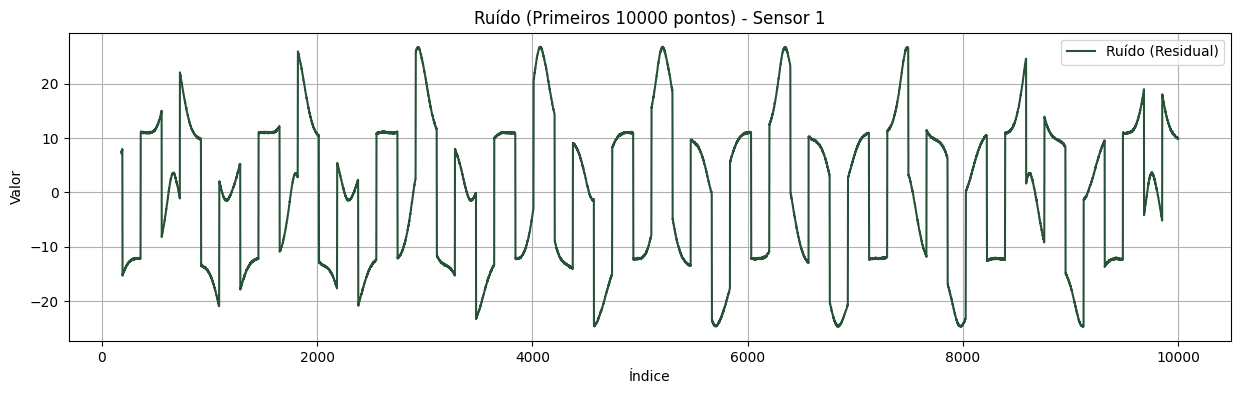

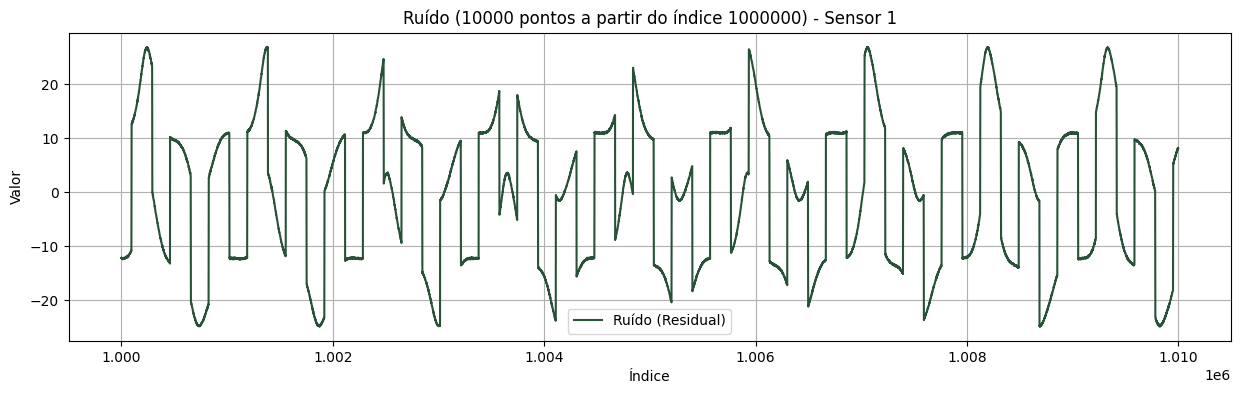

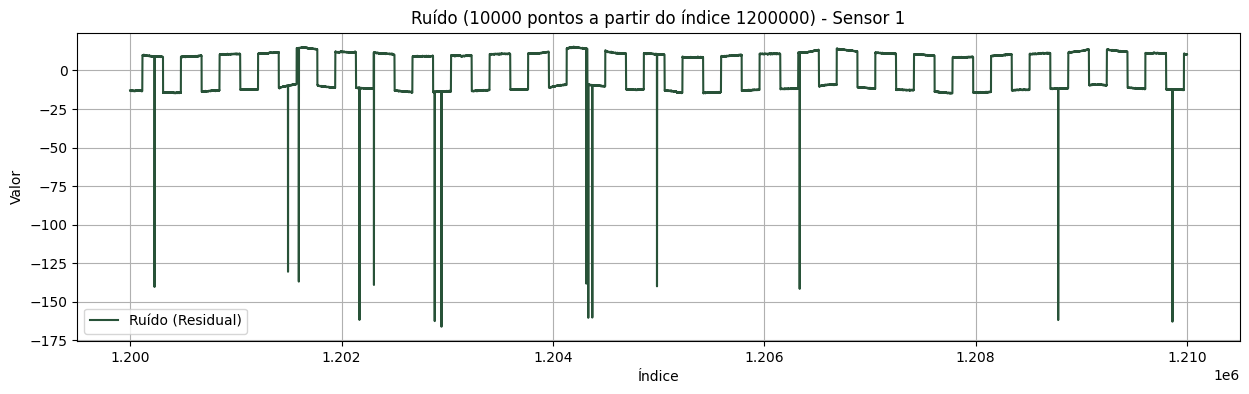

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar o ruído (resíduos) em diferentes intervalos
def plot_noise_section(result, indices, index_start, num_points, sensor, section_label):
    """
    Função para plotar o ruído (resíduos) de uma série temporal em uma seção específica.

    Parâmetros:
        result (DecomposeResult): Objeto de decomposição sazonal contendo `resid`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para plotagem.
        num_points (int): Número de pontos a exibir.
        sensor (int): Identificador do sensor (usado para títulos).
        section_label (str): Rótulo para a seção atual no título do gráfico.
    """
    # Calcular o índice final com base no número de pontos
    index_end = index_start + num_points

    # Garantir que os índices não ultrapassem os limites da série
    max_index = len(indices)
    if index_end > max_index:
        index_end = max_index
        print(f"Ajustando índice final para {max_index} devido ao limite dos dados.")

    # Criar o gráfico
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.resid[index_start:index_end], color='#285238', label='Ruído (Residual)')
    plt.title(f'{section_label} - Sensor {sensor}')
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.legend()
    plt.grid(True)  # Adiciona grade ao gráfico para melhor visualização
    plt.show()


# Plotagem da primeira seção (Primeiros 10000 pontos)
plot_noise_section(
    result=result,
    indices=indices,
    index_start=0,
    num_points=10000,
    sensor=sensor,
    section_label=f'Ruído (Primeiros 10000 pontos)'
)

# Plotagem da segunda seção (A partir do índice 1000000 por 10000 pontos)
plot_noise_section(
    result=result,
    indices=indices,
    index_start=1000000,
    num_points=10000,
    sensor=sensor,
    section_label=f'Ruído (10000 pontos a partir do índice 1000000)'
)

# Plotagem da terceira seção (A partir do índice 1200000 por 10000 pontos)
plot_noise_section(
    result=result,
    indices=indices,
    index_start=1200000,
    num_points=10000,
    sensor=sensor,
    section_label=f'Ruído (10000 pontos a partir do índice 1200000)'
)


## 1.6 Aplicação do algoritmo para detectar anomalias usando a componente do ruído

<ipython-input-7-41626bd3d618>:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')


Primeiros resíduos: [7.22857357 7.22857357 7.22857357 7.22857357 7.22857357 7.22857357
 7.22857357 7.22857357 7.22857357 7.22857357]
Pontuações de anomalia: [1.39551352 1.39551352 1.39551352 1.39551352 1.39551352 1.39551352
 1.39551352 1.39551352 1.39551352 1.39551352]
Probabilidades de anomalia: [0.80147099 0.80147099 0.80147099 0.80147099 0.80147099 0.80147099
 0.80147099 0.80147099 0.80147099 0.80147099]
Índices de anomalias detectadas: [1166719 1166720 1166721 1166722 1166723 1166724 1166725 1166726 1166727
 1166728 1166729 1166730 1166731 1166732 1166733 1166734 1166735 1166736
 1166737 1166738 1166739 1166740 1166741 1166742 1166743 1166744 1166745
 1166746 1166747 1166748 1166749 1166750 1166751 1166752 1166753 1166754
 1166755 1166756 1166757 1166758 1166759 1166760 1166761 1166762 1166763
 1166764 1166765 1166766 1166767 1166768 1166769 1166770 1166771 1166772
 1166773 1166774 1166775 1166776 1166777 1166778 1166779 1166780 1166781
 1166782 1166783 1166784 1166785 1166786 1166

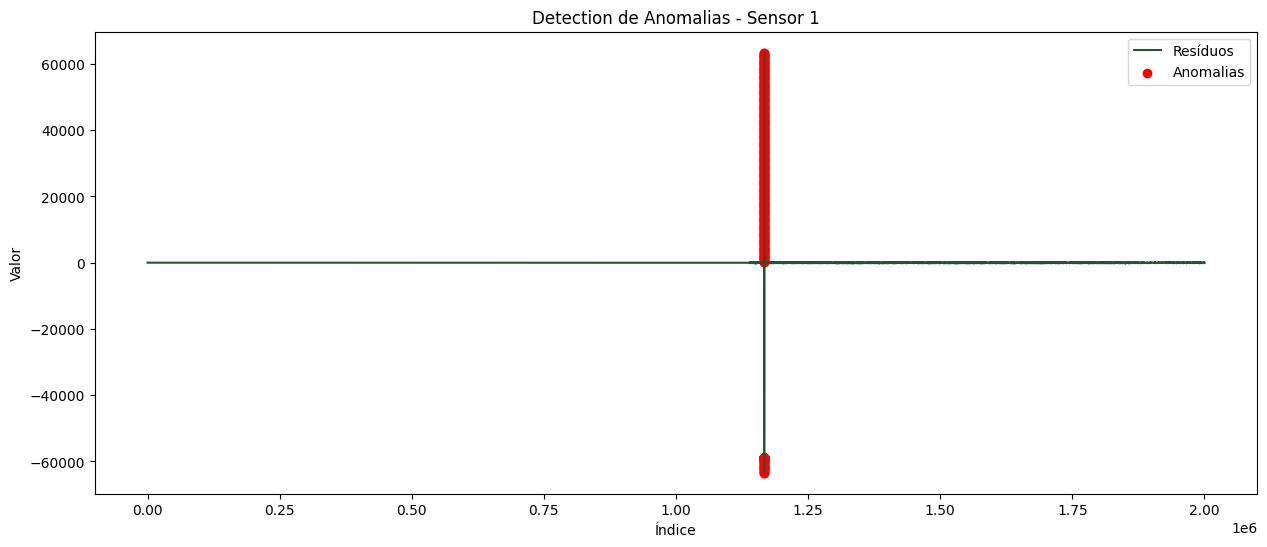

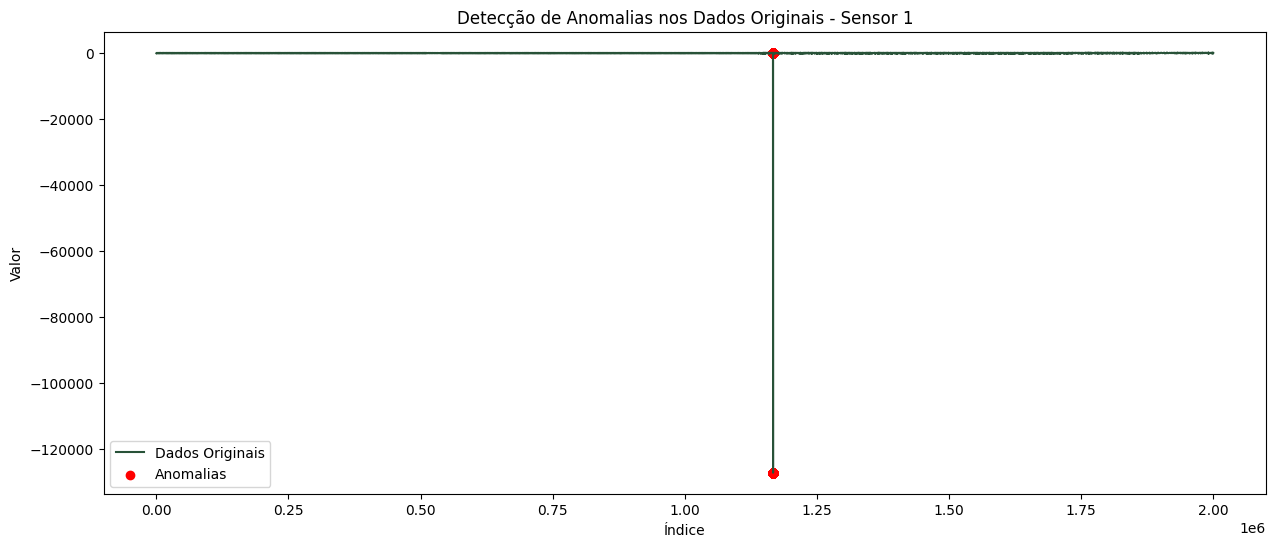

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Função sigmoide
def sigmoid(x):
    """
    Converte valores em probabilidades entre 0 e 1 usando a função sigmoide.
    """
    return 1 / (1 + np.exp(-x))

def double_absolute_median_anomaly_detection(data, threshold=3.5):
    """
    Detecta anomalias com base em desvios absolutos da mediana (DAMA).

    Parâmetros:
        data (array-like): Dados de entrada (resíduos ou valores brutos).
        threshold (float): Limiar para classificar pontos como anomalias.

    Retorna:
        anomalies (array-like): Booleano indicando se o ponto é uma anomalia.
        anomaly_score (array-like): Pontuação de anomalia para cada ponto.
    """
    # Calcula a mediana dos dados
    median = np.median(data)

    # Calcula os desvios absolutos da mediana
    first_mad_deviation = np.abs(data - median)

    # Calcula a mediana dos desvios absolutos
    second_median = np.median(first_mad_deviation)

    # Calcula o desvio absoluto da segunda mediana
    second_mad = np.median(np.abs(first_mad_deviation - second_median))

    # Pontuação de anomalia (quanto maior, mais provável de ser anômalo)
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Classifica como anomalia se a pontuação for maior que o threshold
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score


# Etapa 1: Preencher valores ausentes em `result.resid`
result_resid_filled = result.resid.interpolate(method='linear')

# Garantir que todos os valores NaN foram preenchidos
if result_resid_filled.isnull().sum() > 0:
    result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')

# Extrair apenas os valores residuais ignorando os índices de datas
resid_values = result_resid_filled.values

# Etapa 2: Detectar anomalias com o método da mediana
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values, threshold=3.5)

# Converter pontuação de anomalia em probabilidades usando a função sigmoide
anomaly_probabilities = sigmoid(anomaly_score)

# Identificar os índices de anomalias (usando um threshold de probabilidade)
anomaly_indices = np.where(anomalies & (anomaly_probabilities >= 1.0))[0]

# Verificar os resultados intermediários
print("Primeiros resíduos:", resid_values[:10])
print("Pontuações de anomalia:", anomaly_score[:10])
print("Probabilidades de anomalia:", anomaly_probabilities[:10])
print("Índices de anomalias detectadas:", anomaly_indices)

# Etapa 3: Visualizar os resultados
# Gráfico 1: Resíduos com as anomalias destacadas
plt.figure(figsize=(15, 6))
plt.plot(resid_values, label='Resíduos', color='#285238')
plt.scatter(anomaly_indices, resid_values[anomaly_indices], color='red', label='Anomalias')
plt.title(f'Detection de Anomalias - Sensor {sensor}')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Gráfico 2: Dados originais com as anomalias destacadas
plt.figure(figsize=(15, 6))
plt.plot(sensor_data_sample.values, label='Dados Originais', color='#285238')
plt.scatter(anomaly_indices, sensor_data_sample.values[anomaly_indices], color='red', label='Anomalias')
plt.title(f'Detecção de Anomalias nos Dados Originais - Sensor {sensor}')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()


# **Análise do sensor 2**

## 2.1 Seleção do sensor 2, decomposição do sinal, plotagem do sinal e dos 3 componentes.

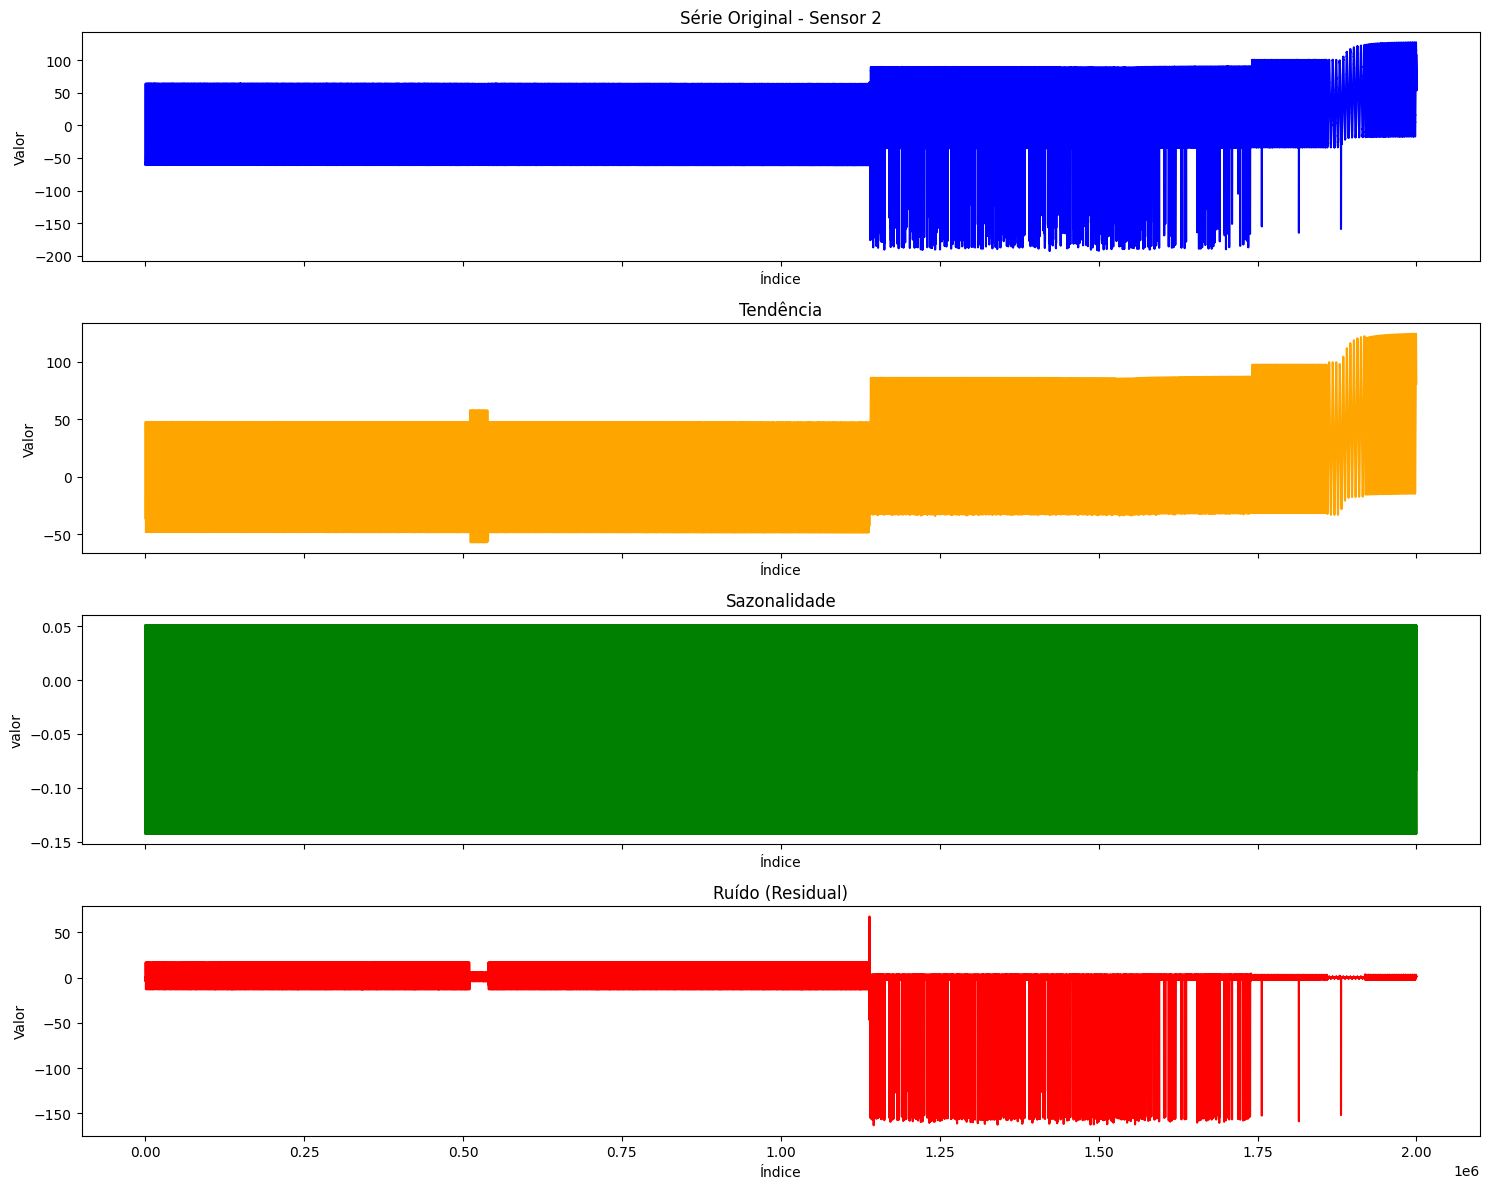

In [ ]:
# Selecionar os dados do Sensor 2
sensor = 2
sensor_index = sensor - 1

# Selecionar os dados do Sensor 2
sensor_data_sample = sensor_data.iloc[:, sensor_index]

# Decompor os dados do Sensor 2
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()


## 2.2 Verificação da sazonalidade




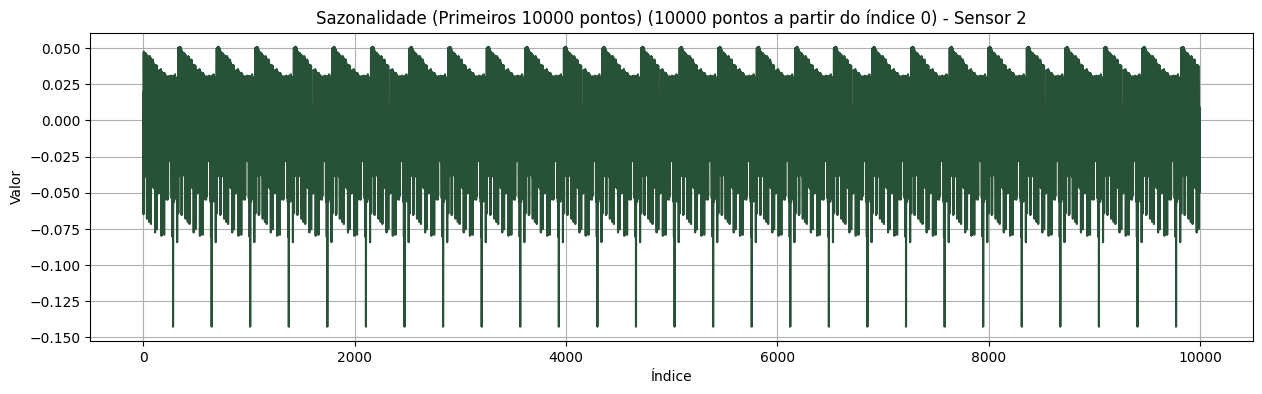

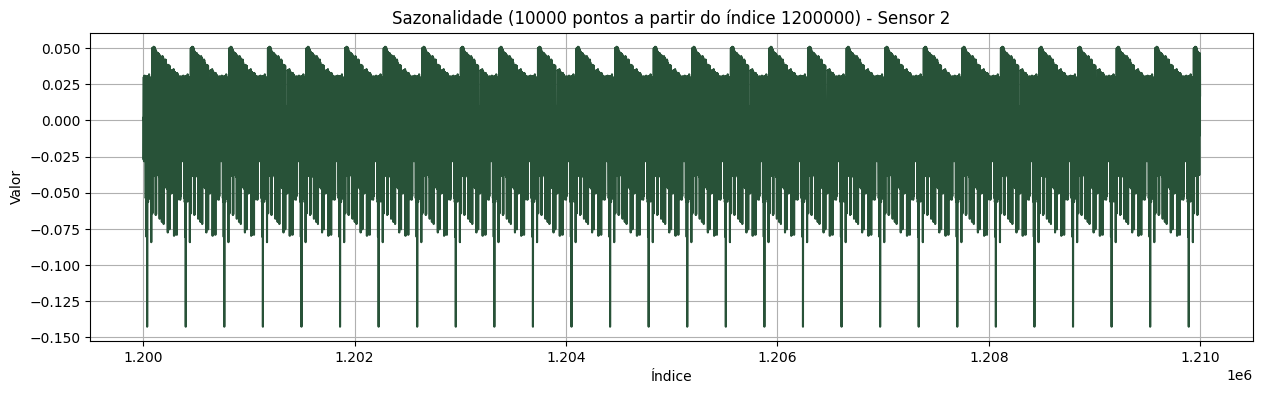

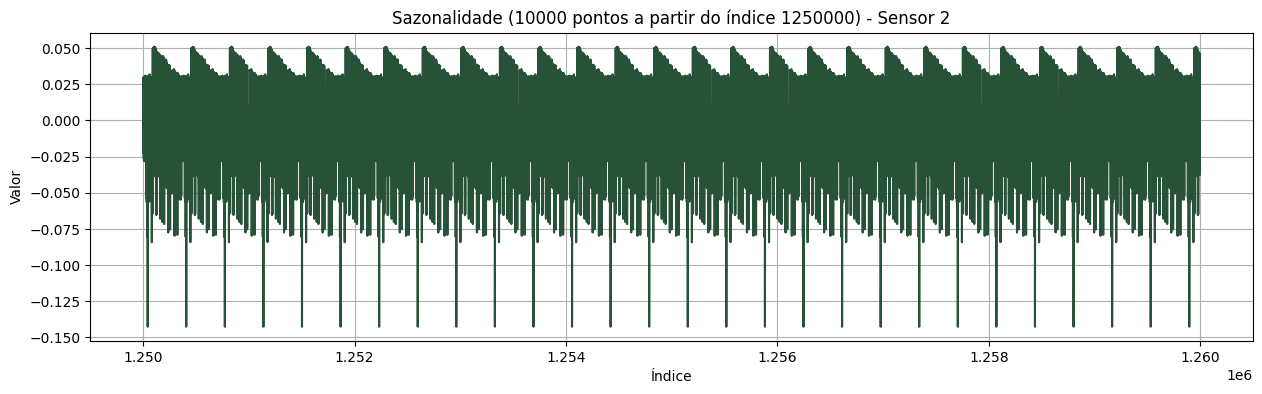

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar a sazonalidade em intervalos específicos
def plot_seasonality(result, indices, index_start, num_points, sensor, title_prefix="Sazonalidade"):
    """
    Função para plotar a sazonalidade de uma série temporal em um intervalo específico.

    Parâmetros:
        result (DecomposeResult): Objeto da decomposição sazonal contendo `seasonal`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para a plotagem.
        num_points (int): Número de pontos a serem exibidos.
        sensor (int/str): Identificador do sensor (exibido no título).
        title_prefix (str): Prefixo do título do gráfico (ex: 'Sazonalidade').
    """
    # Definir índice final com base no número de pontos
    index_end = index_start + num_points

    # Garantir que os índices não ultrapassem os limites da série
    max_index = len(indices)
    if index_end > max_index:
        print(f"Índice final ajustado de {index_end} para {max_index} (limite dos dados).")
        index_end = max_index

    # Criar gráfico para o intervalo solicitado
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.seasonal[index_start:index_end], color='#285238')
    plt.title(f"{title_prefix} ({num_points} pontos a partir do índice {index_start}) - Sensor {sensor}")
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.grid(True)  # Adicionar grade ao gráfico
    plt.show()

# Plotando as seções de sazonalidade
plot_seasonality(
    result=result,
    indices=indices,
    index_start=0,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade (Primeiros 10000 pontos)"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1200000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1250000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)



### 2.3  Verificação do ruído. Enquanto a sazonalidade parece manter o mesmo padrão da série original, O ruído demonstra alteração

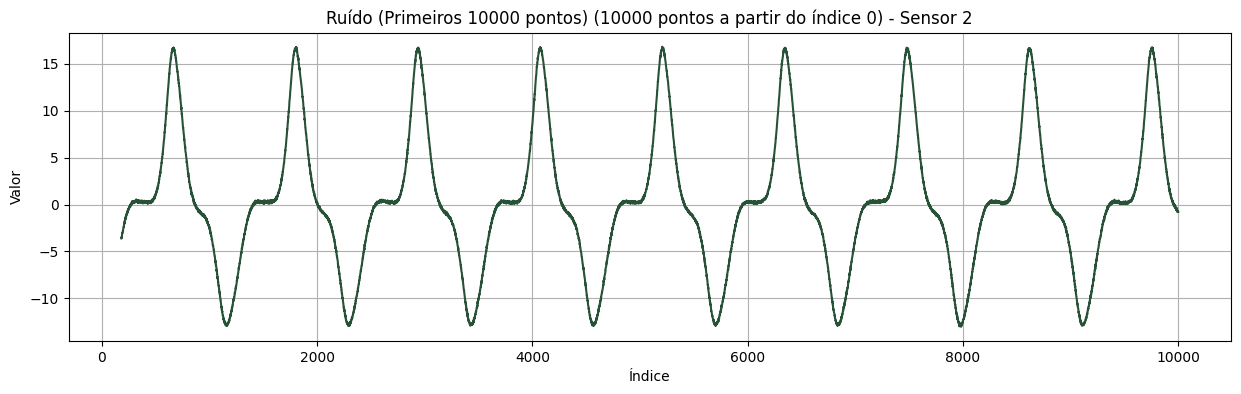

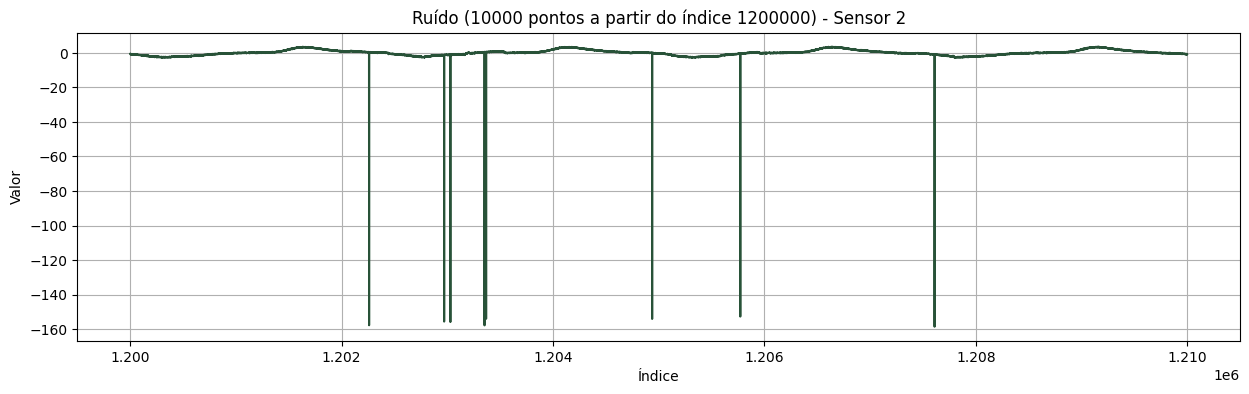

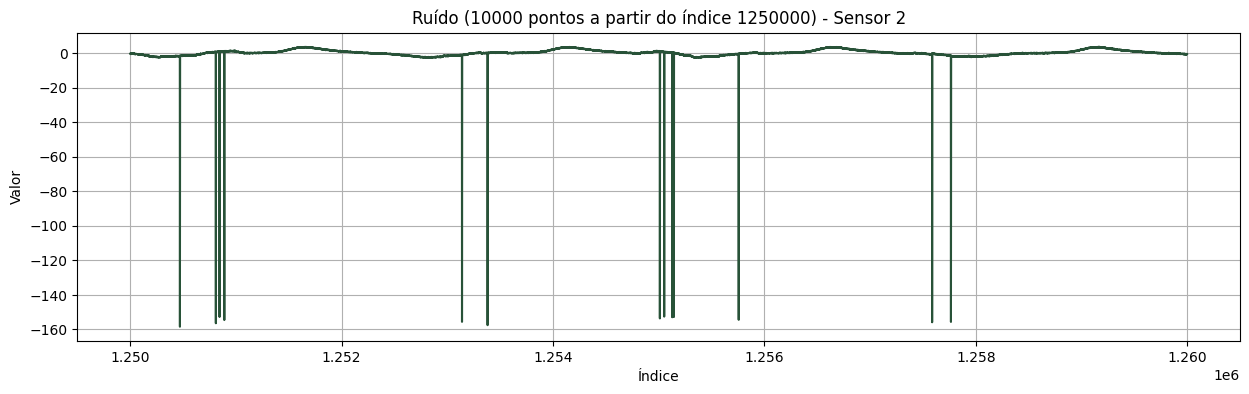

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar o ruído (resíduos) de uma série temporal em intervalos específicos
def plot_noise(result, indices, index_start, num_points, sensor, title_prefix="Ruído"):
    """
    Função para plotar a componente de ruído (residual) de uma decomposição sazonal.

    Parâmetros:
        result (DecomposeResult): Objeto da decomposição sazonal contendo `resid`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para a plotagem.
        num_points (int): Número de pontos a serem exibidos.
        sensor (int/str): Identificador do sensor (exibido no título).
        title_prefix (str): Prefixo do título do gráfico (ex: 'Ruído').
    """
    # Definir índice final com base no número de pontos
    index_end = index_start + num_points

    # Garantir que os índices não ultrapassem os limites da série
    max_index = len(indices)
    if index_end > max_index:
        print(f"Índice final ajustado de {index_end} para {max_index} (limite dos dados).")
        index_end = max_index

    # Criar gráfico para o intervalo solicitado
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.resid[index_start:index_end], color='#285238')
    plt.title(f"{title_prefix} ({num_points} pontos a partir do índice {index_start}) - Sensor {sensor}")
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.grid(True)  # Adicionar grade ao gráfico
    plt.show()

# Plotando as seções de ruído (resíduos)
plot_noise(
    result=result,
    indices=indices,
    index_start=0,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído (Primeiros 10000 pontos)"
)

plot_noise(
    result=result,
    indices=indices,
    index_start=1200000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído"
)

plot_noise(
    result=result,
    indices=indices,
    index_start=1250000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído"
)


##2.4 Aplicação do Algoritmo de Detecção de Anomalias

<ipython-input-11-22416e85ae84>:63: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')


Primeiros resíduos analisados: [-3.61537776 -3.61537776 -3.61537776 -3.61537776 -3.61537776 -3.61537776
 -3.61537776 -3.61537776 -3.61537776 -3.61537776]
Pontuações de anomalia: [1.81856444 1.81856444 1.81856444 1.81856444 1.81856444 1.81856444
 1.81856444 1.81856444 1.81856444 1.81856444]
Probabilidade de anomalia: [0.86039378 0.86039378 0.86039378 0.86039378 0.86039378 0.86039378
 0.86039378 0.86039378 0.86039378 0.86039378]
Índices das anomalias detectadas: [1139479 1139480 1139481 1139482 1139483 1139484 1139485 1139486 1139487
 1139488]


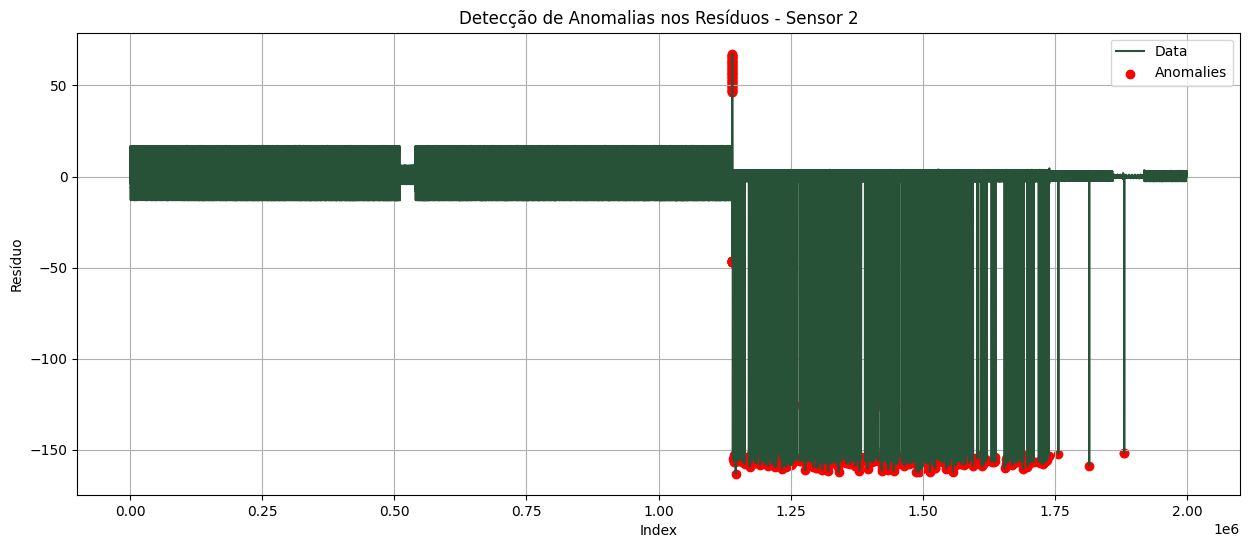

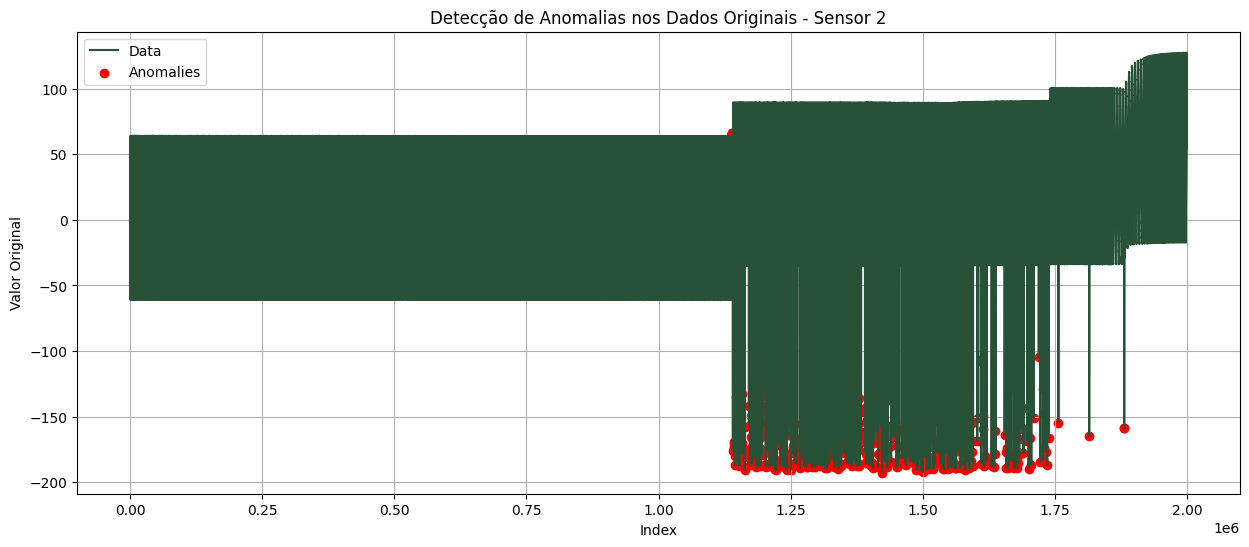

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Função sigmoide para converter scores em probabilidades entre 0 e 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Função de detecção de anomalias baseada na mediana dupla
def double_absolute_median_anomaly_detection(data, threshold=3.5):
    """
    Detecta anomalias usando um método baseado em desvios da mediana dupla.

    Parâmetros:
        data (array-like): Série temporal a ser analisada.
        threshold (float): Limiar de detecção de anomalias.

    Retorna:
        anomalies (array-like): Array booleano indicando os pontos anômalos.
        anomaly_score (array-like): Pontuação de anomalia para cada ponto.
    """
    median = np.median(data)  # Calcula a mediana da série
    first_mad_deviation = np.abs(data - median)  # Desvio absoluto da mediana
    second_median = np.median(first_mad_deviation)  # Mediana dos desvios absolutos
    second_mad = np.median(np.abs(first_mad_deviation - second_median))  # Mediana do segundo desvio

    # Cálculo da pontuação de anomalia normalizada
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Classificação de anomalias
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score

# Função para plotar os dados e destacar as anomalias
def plot_anomalies(x_values, y_values, anomaly_indices, title, ylabel):
    """
    Plota os dados e destaca as anomalias detectadas.

    Parâmetros:
        x_values (array-like): Eixo X (índices).
        y_values (array-like): Eixo Y (valores da série).
        anomaly_indices (array-like): Índices das anomalias detectadas.
        title (str): Título do gráfico.
        ylabel (str): Rótulo do eixo Y.
    """
    plt.figure(figsize=(15, 6))
    plt.plot(x_values, y_values, label='Data', color='#285238')
    plt.scatter(x_values[anomaly_indices], y_values[anomaly_indices], color='red', label='Anomalies')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)  # Adiciona grade ao gráfico para melhor visualização
    plt.show()

# Preenchendo os valores NaN nos resíduos usando interpolação
result_resid_filled = result.resid.interpolate(method='linear')

# Garantir que todos os valores NaN foram preenchidos corretamente
if result_resid_filled.isnull().sum() > 0:
    result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')

# Extração dos valores residuais para análise
resid_values = result_resid_filled.values

# Detecção de anomalias usando o método da mediana dupla
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values, threshold=3.5)

# Conversão das pontuações de anomalia em probabilidades
anomaly_probabilities = sigmoid(anomaly_score)

# Filtragem dos índices de anomalias com base na probabilidade
anomaly_indices = np.where(anomalies & (anomaly_probabilities >= 1.0))[0]

# Exibir os primeiros resultados detectados
print("Primeiros resíduos analisados:", resid_values[:10])
print("Pontuações de anomalia:", anomaly_score[:10])
print("Probabilidade de anomalia:", anomaly_probabilities[:10])
print("Índices das anomalias detectadas:", anomaly_indices[:10])

# Plotagem dos resíduos com as anomalias detectadas
plot_anomalies(
    x_values=np.arange(len(resid_values)),
    y_values=resid_values,
    anomaly_indices=anomaly_indices,
    title=f'Detecção de Anomalias nos Resíduos - Sensor {sensor}',
    ylabel='Resíduo'
)

# Plotagem dos dados originais com as anomalias detectadas
plot_anomalies(
    x_values=np.arange(len(sensor_data_sample.values)),
    y_values=sensor_data_sample.values,
    anomaly_indices=anomaly_indices,
    title=f'Detecção de Anomalias nos Dados Originais - Sensor {sensor}',
    ylabel='Valor Original'
)


# **Análise do sensor 3**

## 3.1 Seleção do sensor 3, decomposição do sinal, plotagem do sinal e dos 3 componentes.

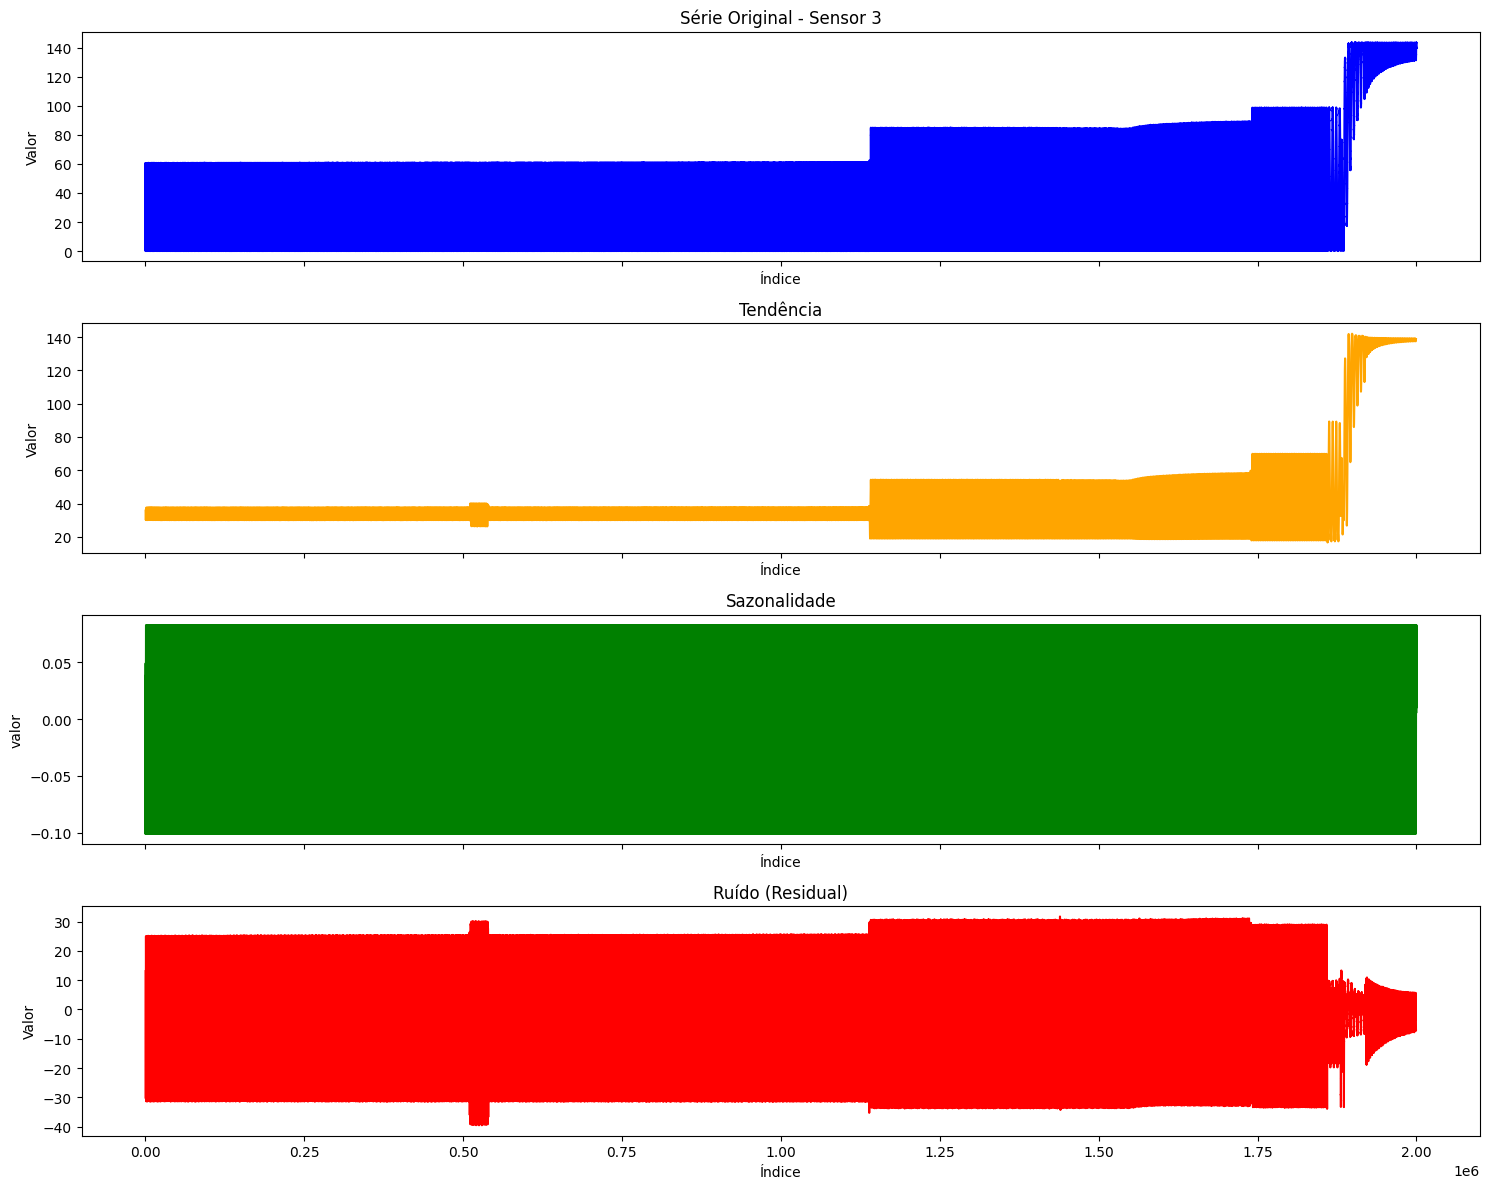

In [49]:
# Selecionar os dados do Sensor 3
sensor = 3
sensor_index = sensor - 1

# Selecionar os dados do Sensor 3
sensor_data_sample = abs(sensor_data.iloc[:, sensor_index])

# Decompor os dados do Sensor 3
result = seasonal_decompose(sensor_data_sample, model='additive', period=1440)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()


## 3.2 Verificação da sazonalidade


<ipython-input-50-a8c93e82782a>:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


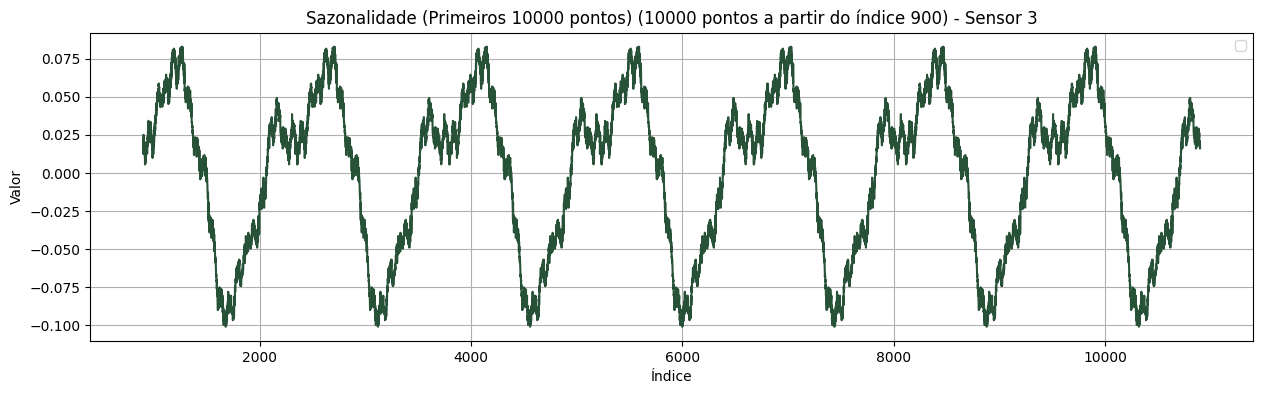

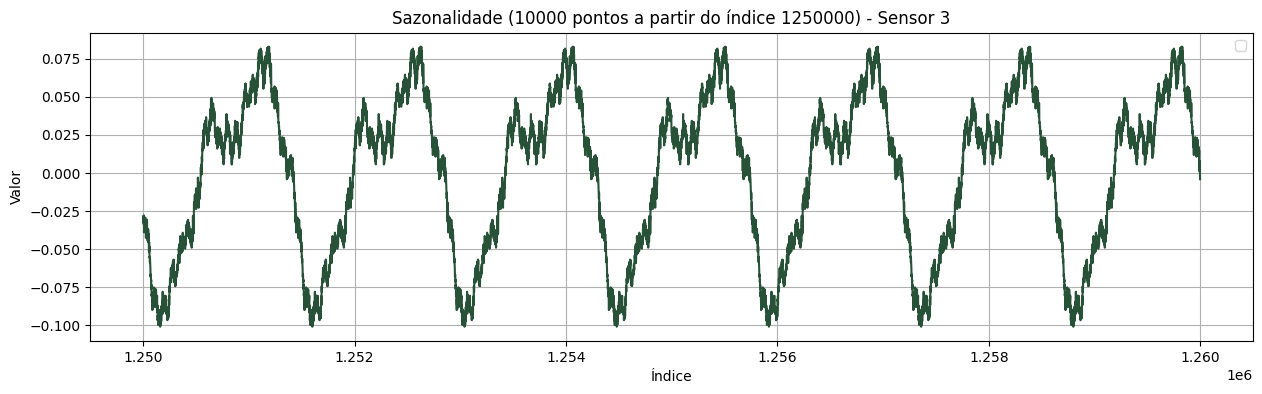

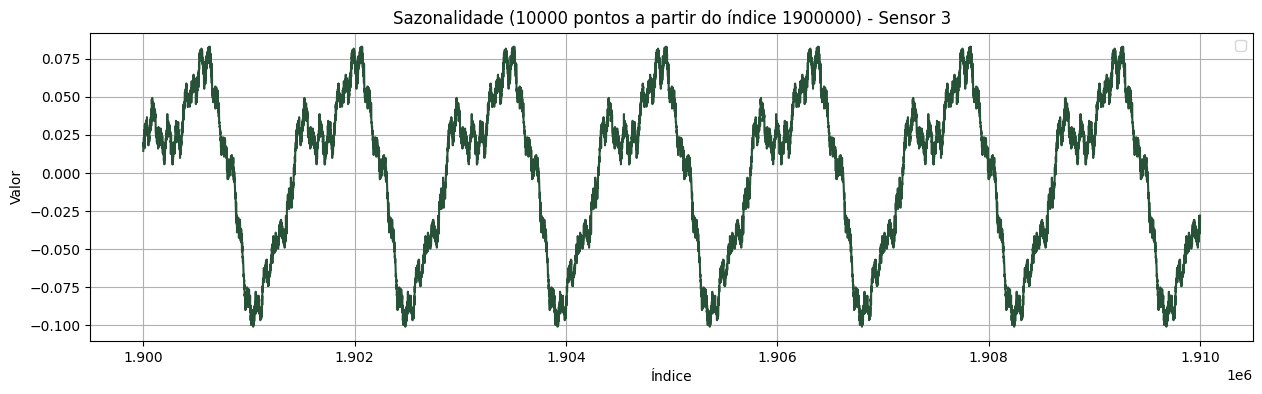

In [50]:
import matplotlib.pyplot as plt

# Função para plotar a sazonalidade em intervalos específicos
def plot_seasonality(result, indices, index_start, num_points, sensor, title_prefix="Sazonalidade"):
    """
    Função para plotar a sazonalidade de uma série temporal em um intervalo específico.

    Parâmetros:
        result (DecomposeResult): Objeto da decomposição sazonal contendo `seasonal`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para a plotagem.
        num_points (int): Número de pontos a serem exibidos.
        sensor (int/str): Identificador do sensor (exibido no título).
        title_prefix (str): Prefixo do título do gráfico (ex: 'Sazonalidade').
    """
    # Definir índice final com base no número de pontos
    max_index = len(indices)
    index_end = min(index_start + num_points, max_index)

    # Verificar se o índice inicial está dentro dos limites dos dados
    if index_start >= max_index:
        print(f"Índice {index_start} fora do limite dos dados ({max_index} pontos disponíveis).")
        return

    # Criar gráfico para o intervalo solicitado
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.seasonal[index_start:index_end], color='#285238')
    plt.title(f"{title_prefix} ({num_points} pontos a partir do índice {index_start}) - Sensor {sensor}")
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.legend()
    plt.grid(True)  # Adiciona grade ao gráfico
    plt.show()

# Plotando as seções de sazonalidade
plot_seasonality(
    result=result,
    indices=indices,
    index_start=900,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade (Primeiros 10000 pontos)"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1250000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1900000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)




### 3.3  Verificação do ruído. Enquanto a sazonalidade parece manter o mesmo padrão da série original, O ruído demonstra alteração

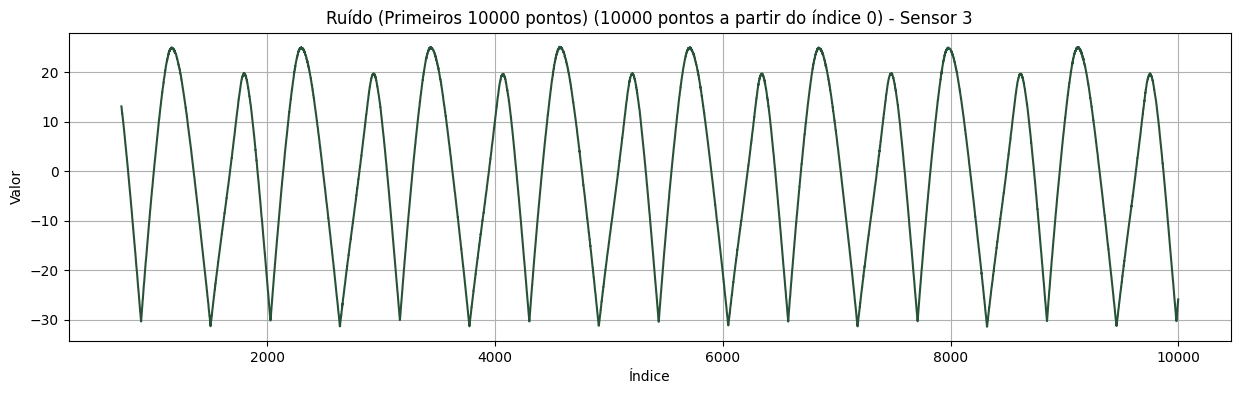

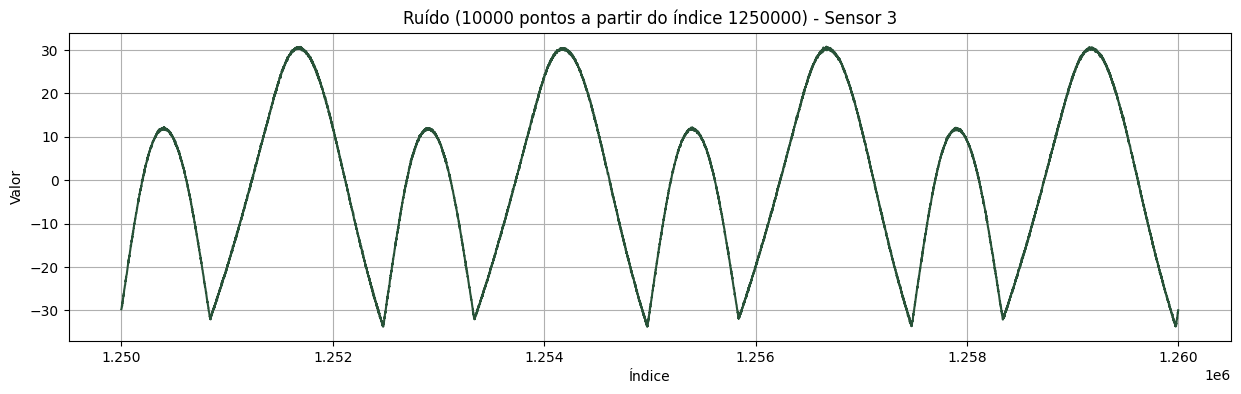

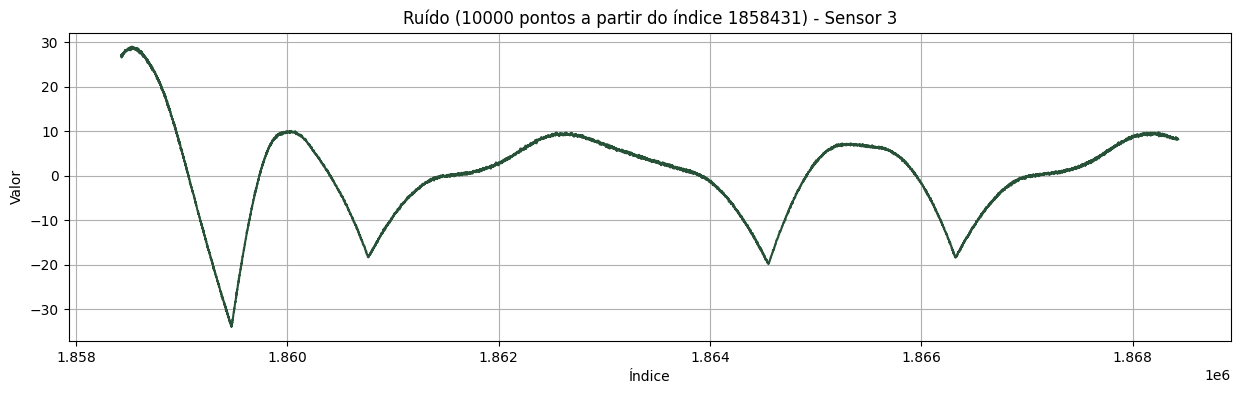

In [51]:
import matplotlib.pyplot as plt

# Função para plotar o ruído (resíduos) da série temporal em intervalos específicos
def plot_noise(result, indices, index_start, num_points, sensor, title_prefix="Ruído"):
    """
    Função para plotar a componente de ruído (residual) de uma decomposição sazonal.

    Parâmetros:
        result (DecomposeResult): Objeto da decomposição sazonal contendo `resid`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para a plotagem.
        num_points (int): Número de pontos a serem exibidos.
        sensor (int/str): Identificador do sensor (exibido no título).
        title_prefix (str): Prefixo do título do gráfico (ex: 'Ruído').
    """
    # Definir índice final com base no número de pontos
    max_index = len(indices)
    index_end = min(index_start + num_points, max_index)

    # Verificar se o índice inicial está dentro dos limites dos dados
    if index_start >= max_index:
        print(f"Índice {index_start} fora do limite dos dados ({max_index} pontos disponíveis).")
        return

    # Criar gráfico para o intervalo solicitado
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.resid[index_start:index_end], color='#285238')  # Cor verde escuro
    plt.title(f"{title_prefix} ({num_points} pontos a partir do índice {index_start}) - Sensor {sensor}")
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.grid(True)  # Adicionar grade ao gráfico
    plt.show()

# Plotando os intervalos de ruído (resíduos)
plot_noise(
    result=result,
    indices=indices,
    index_start=0,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído (Primeiros 10000 pontos)"
)

plot_noise(
    result=result,
    indices=indices,
    index_start=1250000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído"
)

plot_noise(
    result=result,
    indices=indices,
    index_start=1858431,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído"
)

## 3.4 Aplicação do Algoritmo de Detecção de Anomalias

Classes nos rótulos: (array([0, 1]), array([1993503,    6497]))
Primeiros resíduos analisados: [13.0744729 13.0744729 13.0744729 13.0744729 13.0744729 13.0744729
 13.0744729 13.0744729 13.0744729 13.0744729]
Pontuações de anomalia: [0.19563041 0.19563041 0.19563041 0.19563041 0.19563041 0.19563041
 0.19563041 0.19563041 0.19563041 0.19563041]
Probabilidade de anomalia: [2.06388e-40 2.06388e-40 2.06388e-40 2.06388e-40 2.06388e-40 2.06388e-40
 2.06388e-40 2.06388e-40 2.06388e-40 2.06388e-40]
Índices das anomalias detectadas: [510584 510585 510586 510587 510588 510589 510590 510591 510592 510593]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


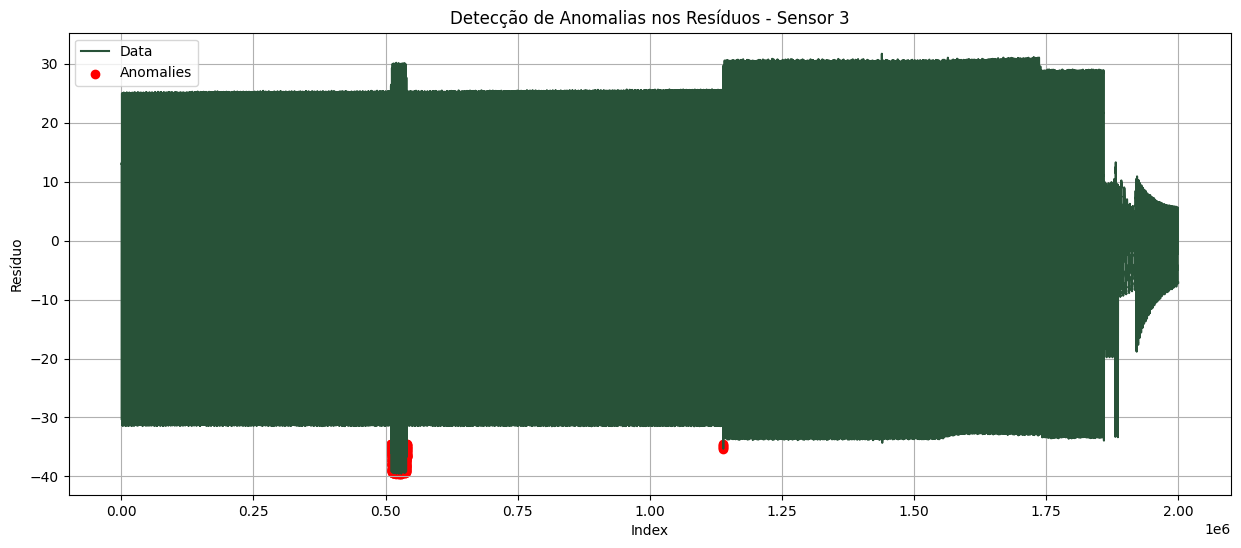

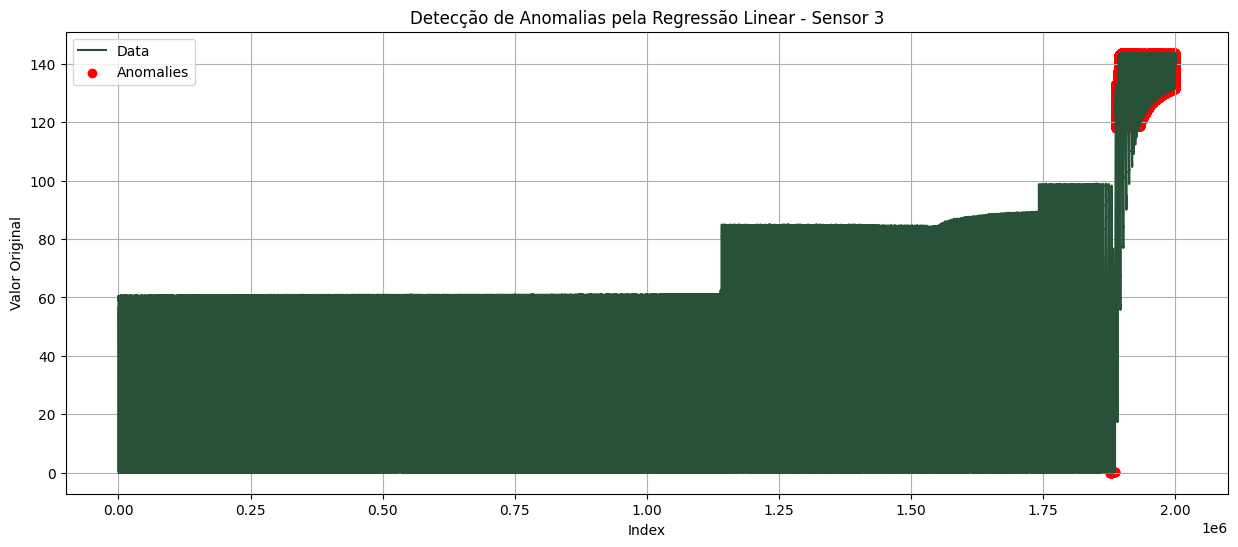

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

# Função sigmoide para conversão de scores em probabilidades
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Função de detecção de anomalias baseada na mediana dupla
def double_absolute_median_anomaly_detection(data, threshold=2.0):
    """
    Detecta anomalias usando um método baseado em desvios da mediana dupla.

    Parâmetros:
        data (array-like): Série temporal a ser analisada.
        threshold (float): Limiar de detecção de anomalias.

    Retorna:
        anomalies (array-like): Array booleano indicando os pontos anômalos.
        anomaly_score (array-like): Pontuação de anomalia para cada ponto.
    """
    median = np.median(data)
    first_mad_deviation = np.abs(data - median)
    second_median = np.median(first_mad_deviation)
    second_mad = np.median(np.abs(first_mad_deviation - second_median))

    # Cálculo da pontuação de anomalia normalizada
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Classificação de anomalias
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score

# Função para plotar os dados e destacar as anomalias detectadas
def plot_anomalies(x_values, y_values, anomaly_indices, title, ylabel):
    """
    Plota os dados e destaca as anomalias detectadas.

    Parâmetros:
        x_values (array-like): Eixo X (índices).
        y_values (array-like): Eixo Y (valores da série).
        anomaly_indices (array-like): Índices das anomalias detectadas.
        title (str): Título do gráfico.
        ylabel (str): Rótulo do eixo Y.
    """
    plt.figure(figsize=(15, 6))
    plt.plot(x_values, y_values, label='Data', color='#285238')

    # Verifica se há anomalias antes de plotar
    if len(anomaly_indices) > 0:
        plt.scatter(x_values[anomaly_indices], y_values[anomaly_indices], color='red', label='Anomalies')

    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)  # Adiciona grade ao gráfico para melhor visualização
    plt.show()

## Ajustar valores ausentes nos resíduos
result_resid_filled = result_resid_filled.bfill().ffill()

# Redefinir o threshold para detecção de anomalias
threshold = 2.5678 # Reduzir para capturar mais anomalias
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values, threshold=threshold)

# Verificar classes dos rótulos
labels = np.array([1 if score > threshold else 0 for score in anomaly_score])
unique_labels = np.unique(labels, return_counts=True)
print("Classes nos rótulos:", unique_labels)

# Garantir que existam pelo menos duas classes
if len(unique_labels[0]) < 2:
    print("Nenhuma anomalia detectada com o threshold atual. Tente reduzir o threshold ou revisar os dados.")
else:
    # Continuar com a calibração de Platt
    X_train, X_test, y_train, y_test = train_test_split(anomaly_score.reshape(-1, 1), labels, test_size=0.2)
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)
    calibrated_probabilities = logistic_model.predict_proba(anomaly_score.reshape(-1, 1))[:, 1]


# Filtragem dos índices de anomalias com base na probabilidade
anomaly_indices = np.where(calibrated_probabilities >= 0.9999)[0]

# Exibir os primeiros resultados detectados
print("Primeiros resíduos analisados:", resid_values[:10])
print("Pontuações de anomalia:", anomaly_score[:10])
print("Probabilidade de anomalia:", calibrated_probabilities[:10])
print("Índices das anomalias detectadas:", anomaly_indices[:10])

# Plotagem dos resíduos com as anomalias detectadas
plot_anomalies(
    x_values=np.arange(len(resid_values)),
    y_values=resid_values,
    anomaly_indices=anomaly_indices,
    title=f'Detecção de Anomalias nos Resíduos - Sensor {sensor}',
    ylabel='Resíduo'
)

# Regressão Linear para modelagem do comportamento esperado
linear_model = LinearRegression()
X = np.arange(len(sensor_data_sample.values)).reshape(-1, 1)  # Índices como variável preditora
y = sensor_data_sample.values  # Valores do sensor como variável dependente
linear_model.fit(X, y)
predicted_values = linear_model.predict(X)

# Calcular resíduos da regressão
residuals_linear = y - predicted_values

# Identificar anomalias nos resíduos da regressão
threshold_residuals = 2 * np.std(residuals_linear)
anomalies_linear = np.abs(residuals_linear) > threshold_residuals

# Plotagem dos dados originais com as anomalias detectadas pela regressão linear
plot_anomalies(
    x_values=np.arange(len(sensor_data_sample.values)),
    y_values=sensor_data_sample.values,
    anomaly_indices=np.where(anomalies_linear)[0],
    title=f'Detecção de Anomalias pela Regressão Linear - Sensor {sensor}',
    ylabel='Valor Original'
)


# **Análise do sensor 4**

## 4.1 Seleção do sensor 2, decomposição do sinal, plotagem do sinal e dos 3 componentes.

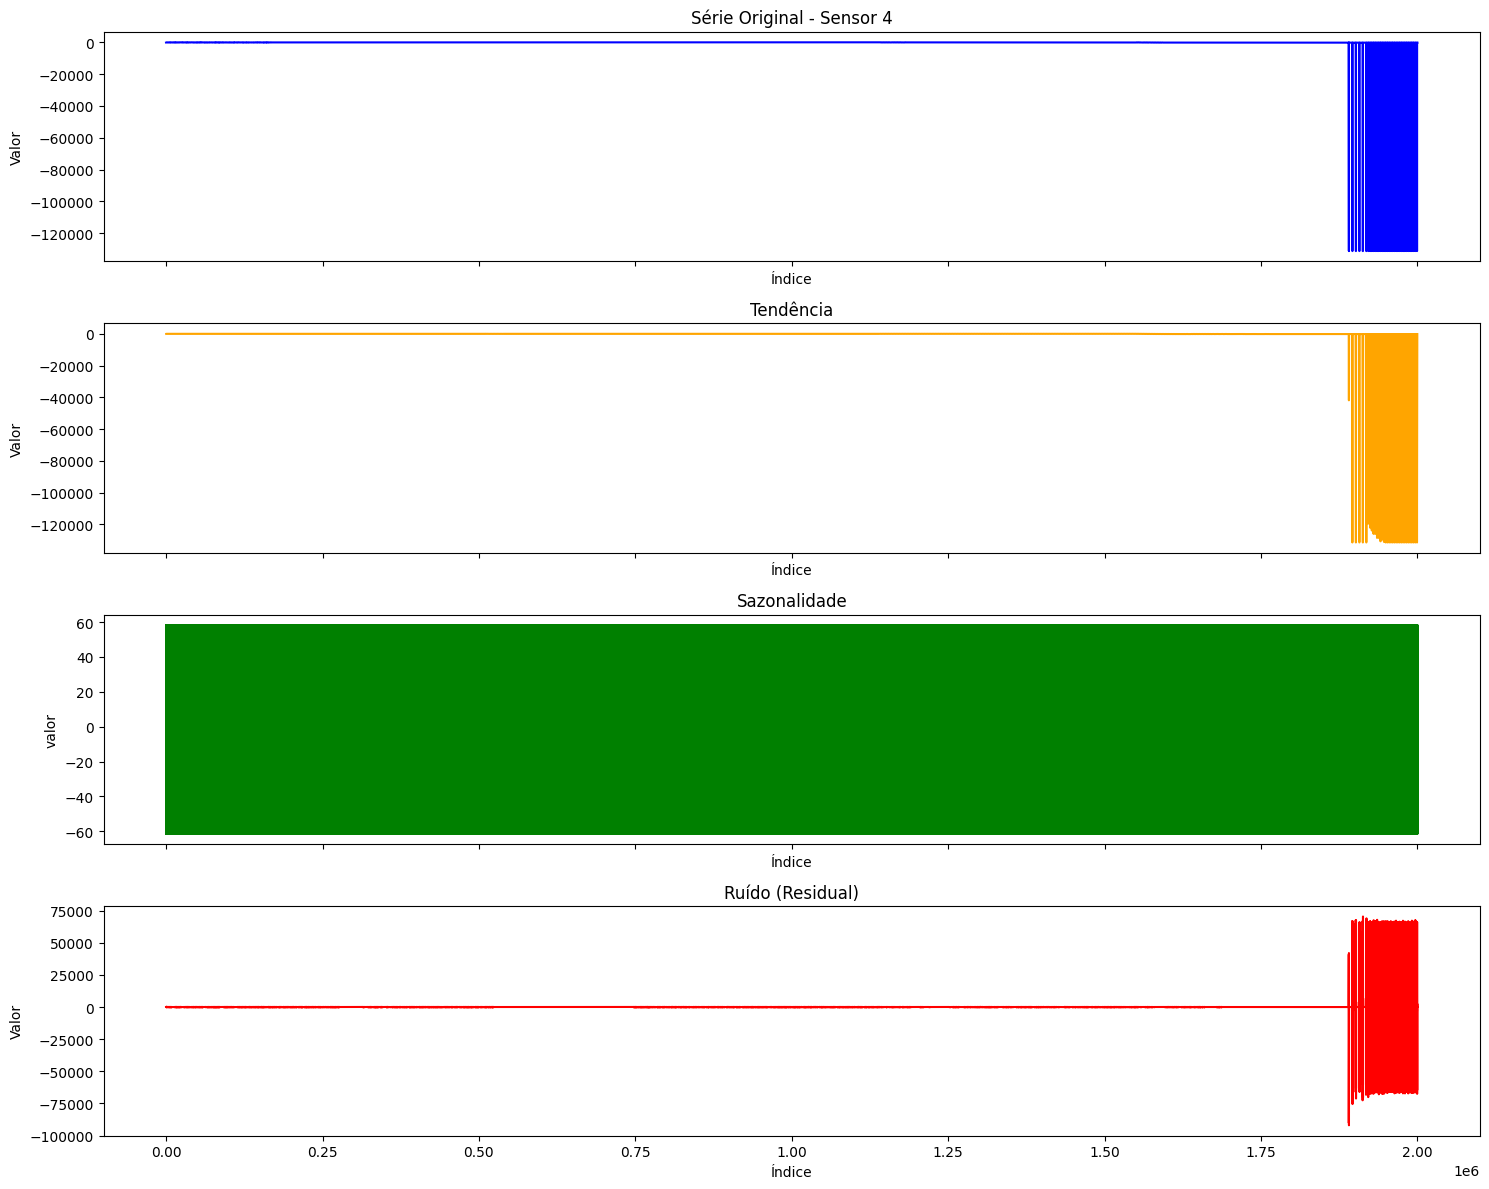

In [ ]:
# Selecionar os dados do Sensor 4
sensor = 4
sensor_index = sensor - 1

# Selecionar os dados do Sensor 4
sensor_data_sample = sensor_data.iloc[:, sensor_index]

# Decompor os dados do Sensor 4
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()


## 4.2 Verificação da sazonalidade

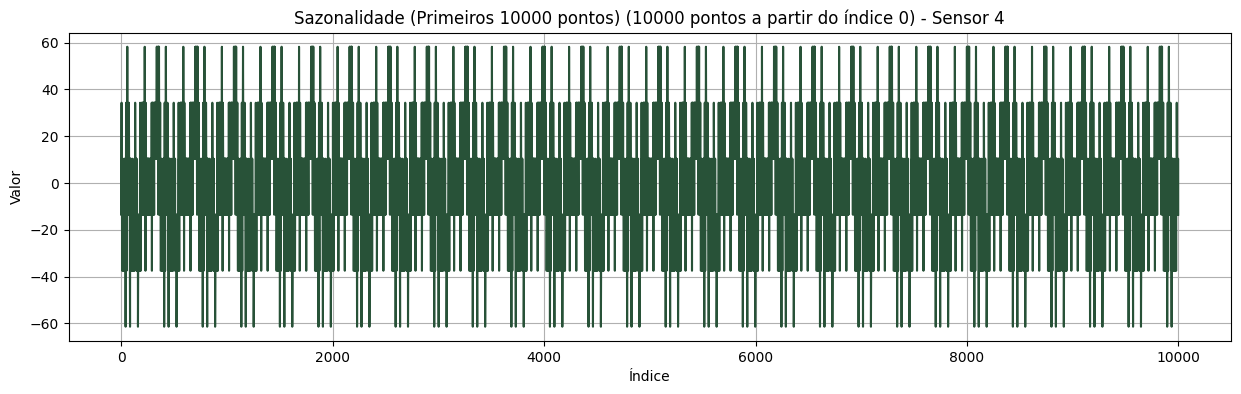

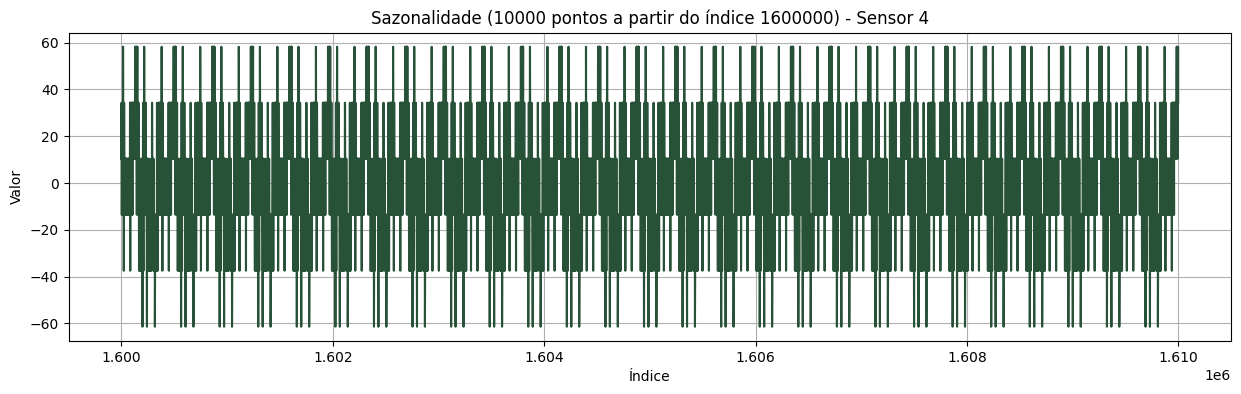

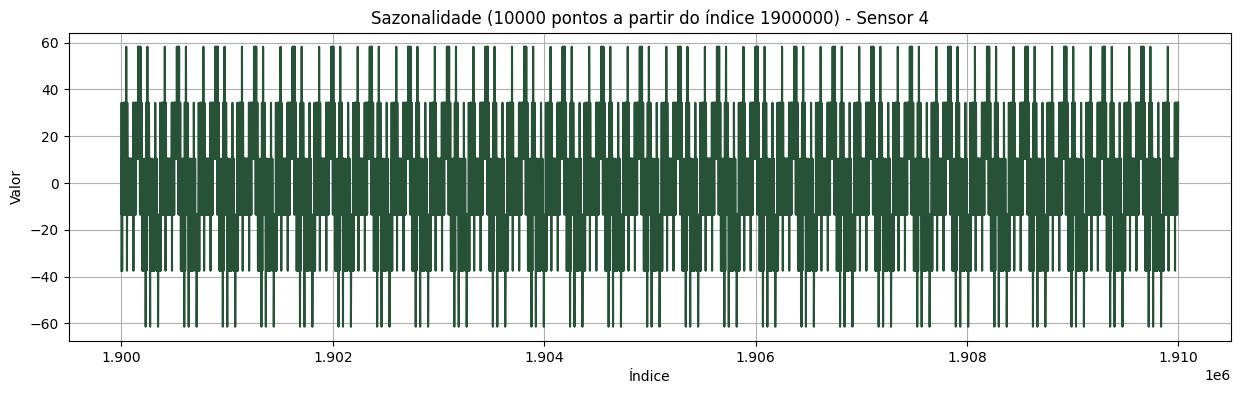

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar a sazonalidade em intervalos específicos
def plot_seasonality(result, indices, index_start, num_points, sensor, title_prefix="Sazonalidade"):
    """
    Função para plotar a sazonalidade de uma série temporal em um intervalo específico.

    Parâmetros:
        result (DecomposeResult): Objeto da decomposição sazonal contendo `seasonal`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para a plotagem.
        num_points (int): Número de pontos a serem exibidos.
        sensor (int/str): Identificador do sensor (exibido no título).
        title_prefix (str): Prefixo do título do gráfico (ex: 'Sazonalidade').
    """
    # Definir índice final com base no número de pontos
    max_index = len(indices)
    index_end = min(index_start + num_points, max_index)

    # Verificar se o índice inicial está dentro dos limites dos dados
    if index_start >= max_index:
        print(f"Índice {index_start} fora do limite dos dados ({max_index} pontos disponíveis).")
        return

    # Criar gráfico para o intervalo solicitado
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.seasonal[index_start:index_end], color='#285238')  # Cor verde escuro
    plt.title(f"{title_prefix} ({num_points} pontos a partir do índice {index_start}) - Sensor {sensor}")
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.grid(True)  # Adiciona grade ao gráfico
    plt.show()

# Plotando as seções de sazonalidade
plot_seasonality(
    result=result,
    indices=indices,
    index_start=0,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade (Primeiros 10000 pontos)"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1600000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1900000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)


##4.3  Verificação do ruído.

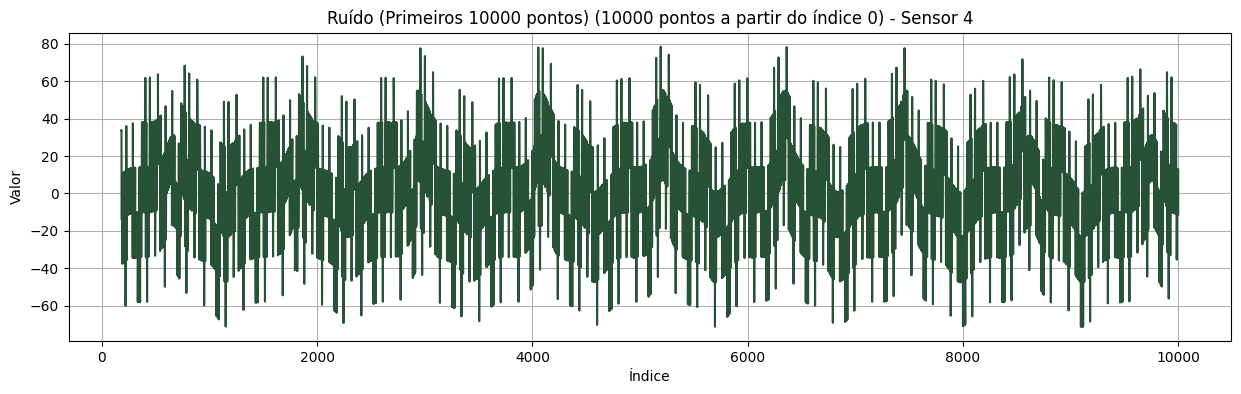

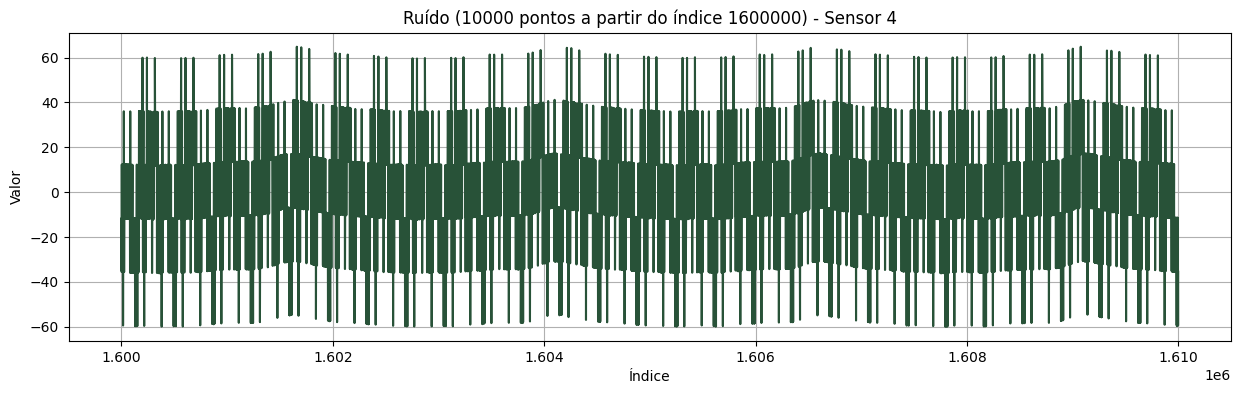

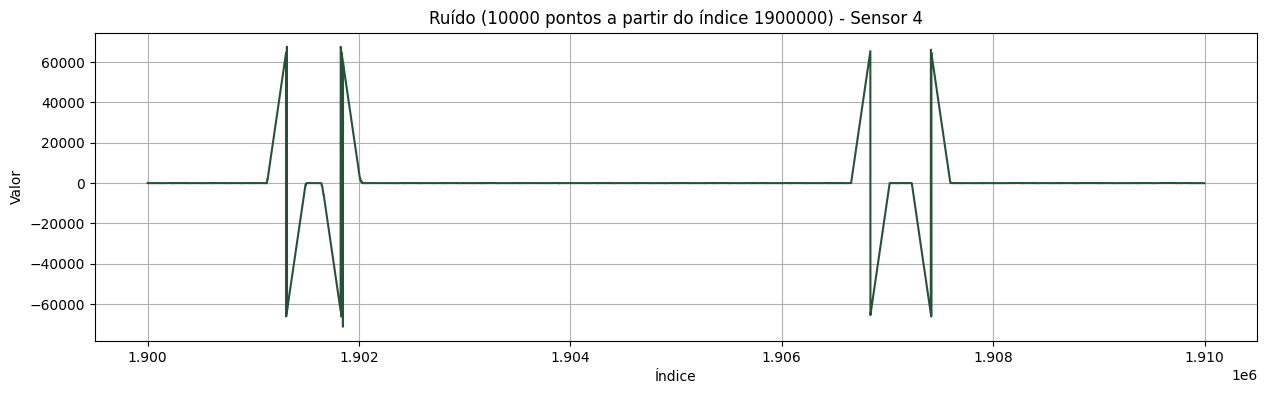

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar o ruído (resíduos) da série temporal em intervalos específicos
def plot_noise(result, indices, index_start, num_points, sensor, title_prefix="Ruído"):
    """
    Função para plotar a componente de ruído (residual) de uma decomposição sazonal.

    Parâmetros:
        result (DecomposeResult): Objeto da decomposição sazonal contendo `resid`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para a plotagem.
        num_points (int): Número de pontos a serem exibidos.
        sensor (int/str): Identificador do sensor (exibido no título).
        title_prefix (str): Prefixo do título do gráfico (ex: 'Ruído').
    """
    # Definir índice final com base no número de pontos
    max_index = len(indices)
    index_end = min(index_start + num_points, max_index)

    # Verificar se o índice inicial está dentro dos limites dos dados
    if index_start >= max_index:
        print(f"Índice {index_start} fora do limite dos dados ({max_index} pontos disponíveis).")
        return

    # Criar gráfico para o intervalo solicitado
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.resid[index_start:index_end], color='#285238')
    plt.title(f"{title_prefix} ({num_points} pontos a partir do índice {index_start}) - Sensor {sensor}")
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.grid(True)  # Adicionar grade ao gráfico
    plt.show()

# Plotando os intervalos de ruído (resíduos)
plot_noise(
    result=result,
    indices=indices,
    index_start=0,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído (Primeiros 10000 pontos)"
)

plot_noise(
    result=result,
    indices=indices,
    index_start=1600000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído"
)

plot_noise(
    result=result,
    indices=indices,
    index_start=1900000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído"
)


##4.4 Aplicação do Algoritmo de Detecção de Anomalias

<ipython-input-40-8879733890f2>:67: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')


Primeiros resíduos analisados: [33.66188317 33.66188317 33.66188317 33.66188317 33.66188317 33.66188317
 33.66188317 33.66188317 33.66188317 33.66188317]
Pontuações de anomalia: [3.08480039 3.08480039 3.08480039 3.08480039 3.08480039 3.08480039
 3.08480039 3.08480039 3.08480039 3.08480039]
Probabilidade de anomalia: [0.9562614 0.9562614 0.9562614 0.9562614 0.9562614 0.9562614 0.9562614
 0.9562614 0.9562614 0.9562614]
Índices das anomalias detectadas: [1890191 1890192 1890193 1890194 1890195 1890196 1890197 1890198 1890199
 1890200]


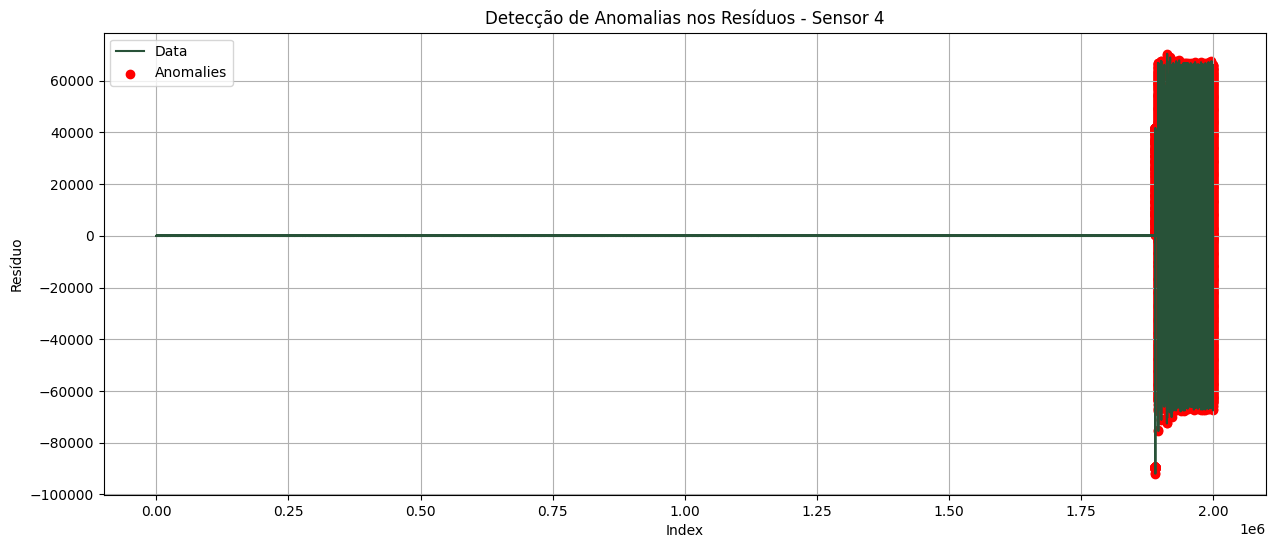

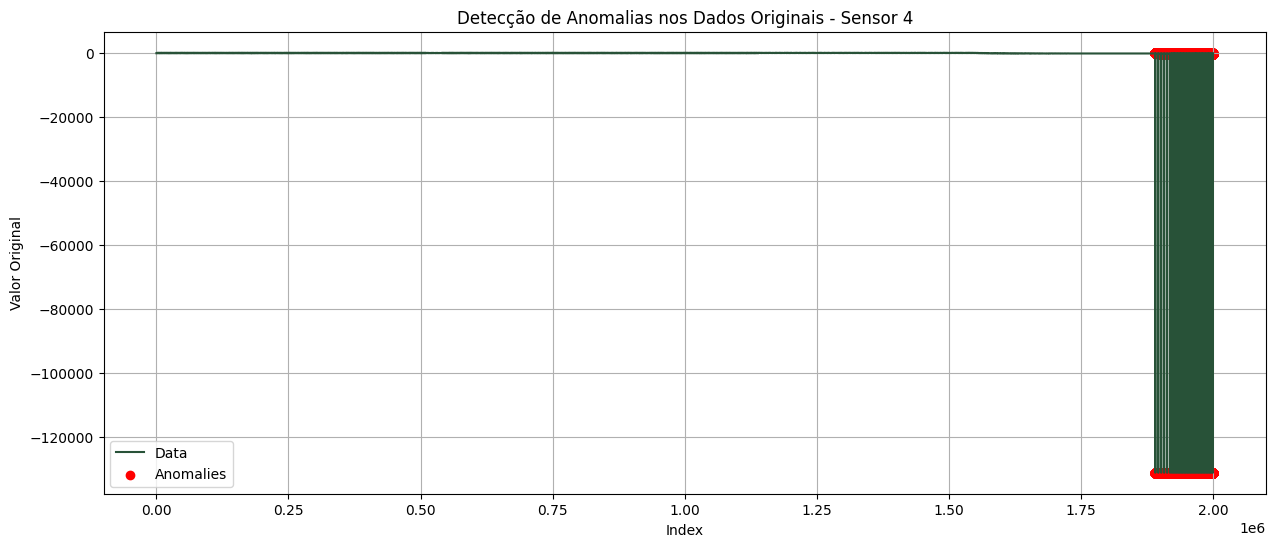

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Função sigmoide para conversão de scores em probabilidades
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Função de detecção de anomalias baseada na mediana dupla
def double_absolute_median_anomaly_detection(data, threshold=3.5):
    """
    Detecta anomalias usando um método baseado em desvios da mediana dupla.

    Parâmetros:
        data (array-like): Série temporal a ser analisada.
        threshold (float): Limiar de detecção de anomalias.

    Retorna:
        anomalies (array-like): Array booleano indicando os pontos anômalos.
        anomaly_score (array-like): Pontuação de anomalia para cada ponto.
    """
    median = np.median(data)
    first_mad_deviation = np.abs(data - median)
    second_median = np.median(first_mad_deviation)
    second_mad = np.median(np.abs(first_mad_deviation - second_median))

    # Cálculo da pontuação de anomalia normalizada
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Classificação de anomalias
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score

# Função para plotar os dados e destacar as anomalias detectadas
def plot_anomalies(x_values, y_values, anomaly_indices, title, ylabel):
    """
    Plota os dados e destaca as anomalias detectadas.

    Parâmetros:
        x_values (array-like): Eixo X (índices).
        y_values (array-like): Eixo Y (valores da série).
        anomaly_indices (array-like): Índices das anomalias detectadas.
        title (str): Título do gráfico.
        ylabel (str): Rótulo do eixo Y.
    """
    plt.figure(figsize=(15, 6))
    plt.plot(x_values, y_values, label='Data', color='#285238')

    # Verifica se há anomalias antes de plotar
    if len(anomaly_indices) > 0:
        plt.scatter(x_values[anomaly_indices], y_values[anomaly_indices], color='red', label='Anomalies')

    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)  # Adiciona grade ao gráfico para melhor visualização
    plt.show()

# Preenchendo os valores NaN nos resíduos usando interpolação
result_resid_filled = result.resid.interpolate(method='linear')

# Garantir que todos os valores NaN foram preenchidos corretamente
if result_resid_filled.isnull().sum() > 0:
    result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')

# Extração dos valores residuais para análise
resid_values = result_resid_filled.values

# Detecção de anomalias usando o método da mediana dupla
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values, threshold=3.5)

# Conversão das pontuações de anomalia em probabilidades
anomaly_probabilities = sigmoid(anomaly_score)

# Filtragem dos índices de anomalias com base na probabilidade
anomaly_indices = np.where(anomalies & (anomaly_probabilities >= 1.0))[0]

# Exibir os primeiros resultados detectados
print("Primeiros resíduos analisados:", resid_values[:10])
print("Pontuações de anomalia:", anomaly_score[:10])
print("Probabilidade de anomalia:", anomaly_probabilities[:10])
print("Índices das anomalias detectadas:", anomaly_indices[:10])

# Plotagem dos resíduos com as anomalias detectadas
plot_anomalies(
    x_values=np.arange(len(resid_values)),
    y_values=resid_values,
    anomaly_indices=anomaly_indices,
    title=f'Detecção de Anomalias nos Resíduos - Sensor {sensor}',
    ylabel='Resíduo'
)

# Plotagem dos dados originais com as anomalias detectadas
plot_anomalies(
    x_values=np.arange(len(sensor_data_sample.values)),
    y_values=sensor_data_sample.values,
    anomaly_indices=anomaly_indices,
    title=f'Detecção de Anomalias nos Dados Originais - Sensor {sensor}',
    ylabel='Valor Original'
)


# **Análise do sensor 5**

## 5.1 Seleção do sensor 2, decomposição do sinal, plotagem do sinal e dos 3 componentes.

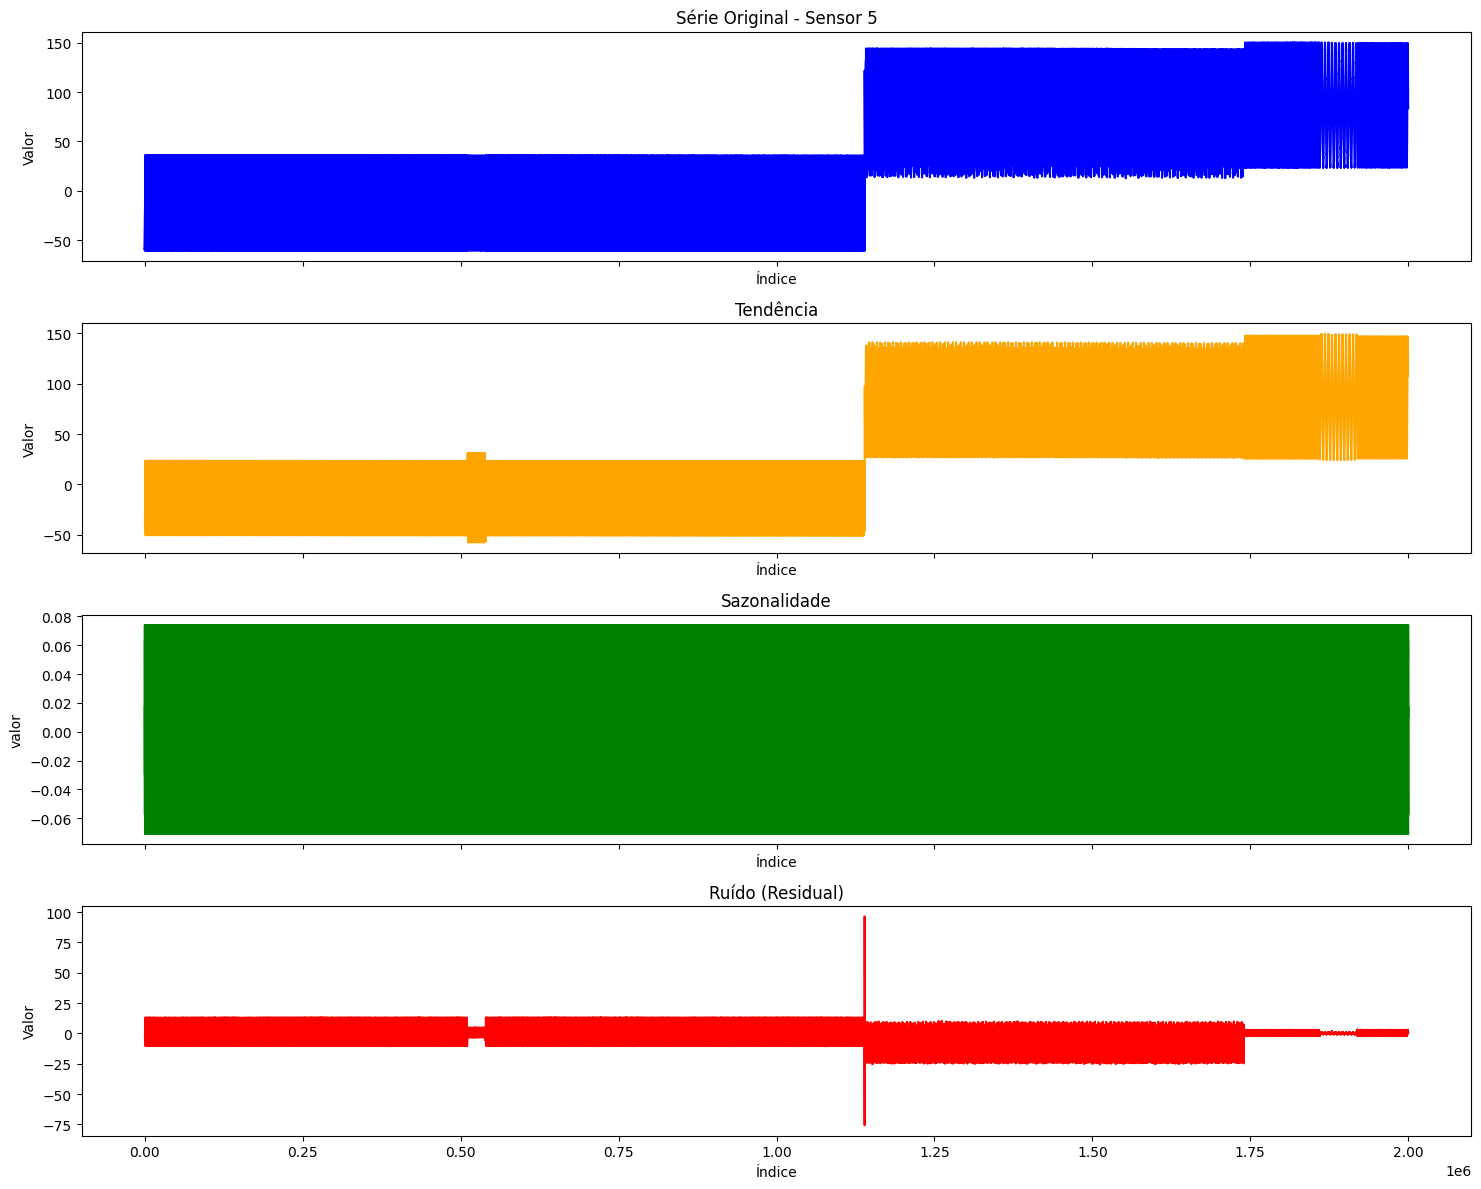

In [ ]:
# Selecionar os dados do Sensor 5
sensor = 5
sensor_index = sensor - 1

# Selecionar os dados do Sensor 5
sensor_data_sample = sensor_data.iloc[:, sensor_index]

# Decompor os dados do Sensor 5
result = seasonal_decompose(sensor_data_sample, model='additive', period=365)

# Criando uma lista de índices para representar o eixo x
indices = range(len(sensor_data_sample))

# Plotando os componentes com Matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar a série original
axes[0].plot(indices, sensor_data_sample, color='blue')
axes[0].set_title(f'Série Original - Sensor {sensor}')
axes[0].set_ylabel('Valor')
axes[0].set_xlabel('Índice')

# Plotar a tendência
axes[1].plot(indices, result.trend, color='orange')
axes[1].set_title('Tendência')
axes[1].set_ylabel('Valor')
axes[1].set_xlabel('Índice')

# Plotar a sazonalidade
axes[2].plot(indices, result.seasonal, color='green')
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('valor')
axes[2].set_xlabel('Índice')

# Plotar o ruído (residual)
axes[3].plot(indices, result.resid, color='red')
axes[3].set_title('Ruído (Residual)')
axes[3].set_ylabel('Valor')
axes[3].set_xlabel('Índice')

# Ajustar layout
plt.tight_layout()
plt.show()

## 5.2 Verificação da sazonalidade

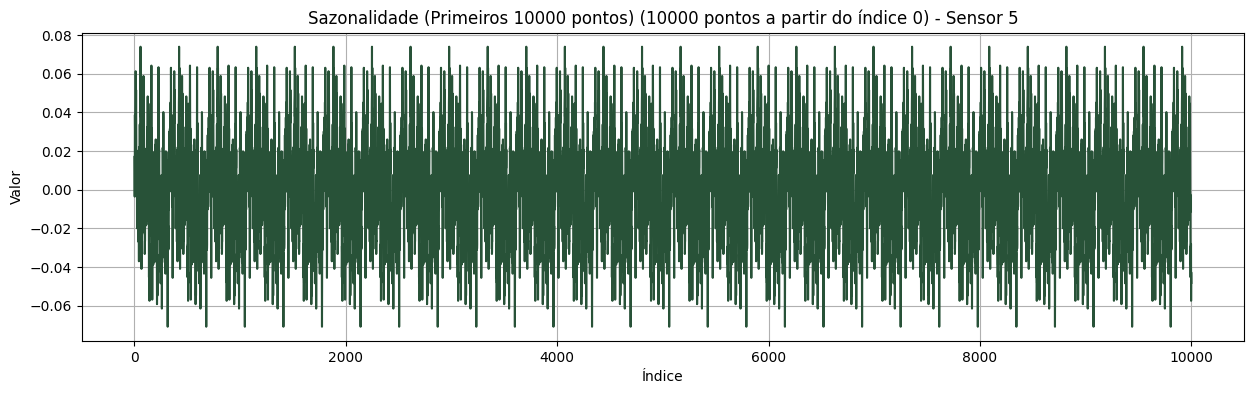

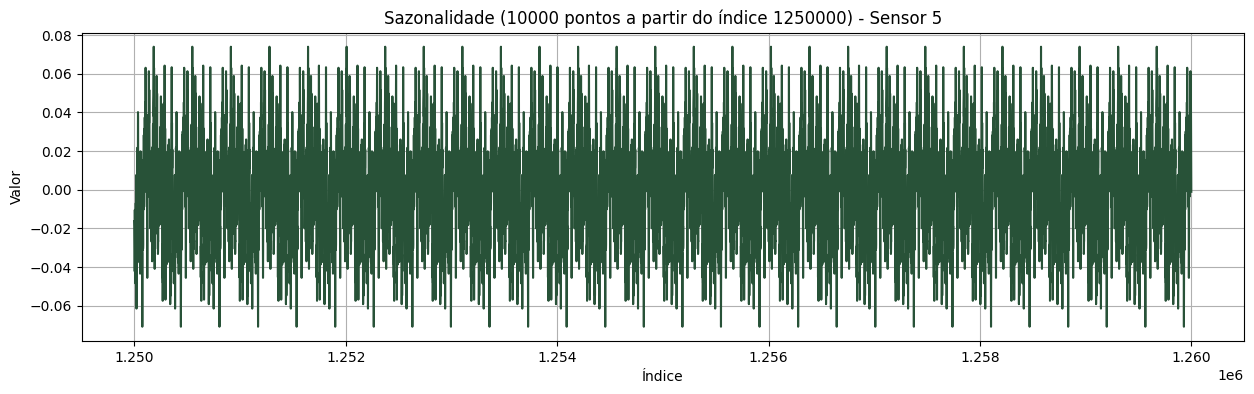

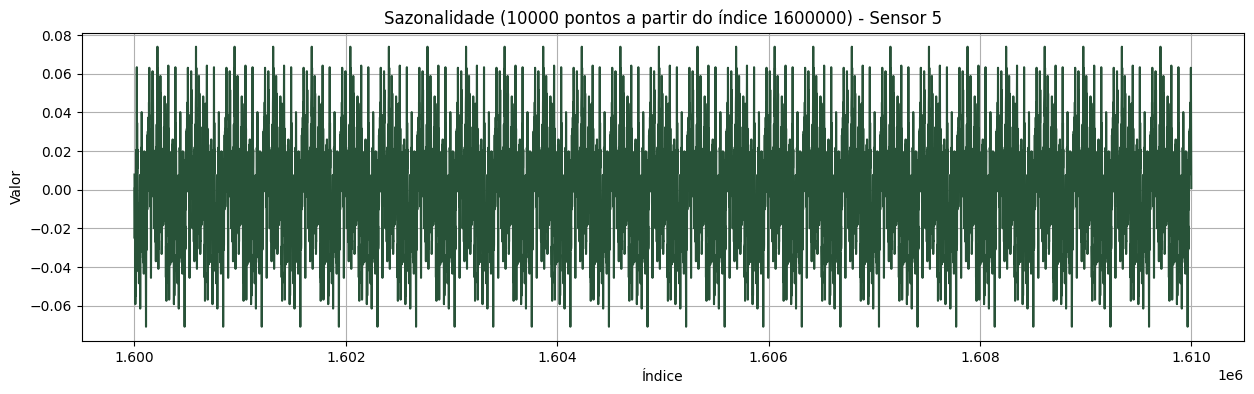

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar a sazonalidade em intervalos específicos
def plot_seasonality(result, indices, index_start, num_points, sensor, title_prefix="Sazonalidade"):
    """
    Função para plotar a sazonalidade de uma série temporal em um intervalo específico.

    Parâmetros:
        result (DecomposeResult): Objeto da decomposição sazonal contendo `seasonal`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para a plotagem.
        num_points (int): Número de pontos a serem exibidos.
        sensor (int/str): Identificador do sensor (exibido no título).
        title_prefix (str): Prefixo do título do gráfico (ex: 'Sazonalidade').
    """
    # Definir índice final com base no número de pontos
    max_index = len(indices)
    index_end = min(index_start + num_points, max_index)

    # Verificar se o índice inicial está dentro dos limites dos dados
    if index_start >= max_index:
        print(f"Índice {index_start} fora do limite dos dados ({max_index} pontos disponíveis).")
        return

    # Criar gráfico para o intervalo solicitado
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.seasonal[index_start:index_end], color='#285238')  # Cor verde escuro
    plt.title(f"{title_prefix} ({num_points} pontos a partir do índice {index_start}) - Sensor {sensor}")
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.grid(True)  # Adicionar grade ao gráfico
    plt.show()

# Plotando as seções de sazonalidade
plot_seasonality(
    result=result,
    indices=indices,
    index_start=0,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade (Primeiros 10000 pontos)"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1250000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)

plot_seasonality(
    result=result,
    indices=indices,
    index_start=1600000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Sazonalidade"
)


##5.3  Verificação do ruído.

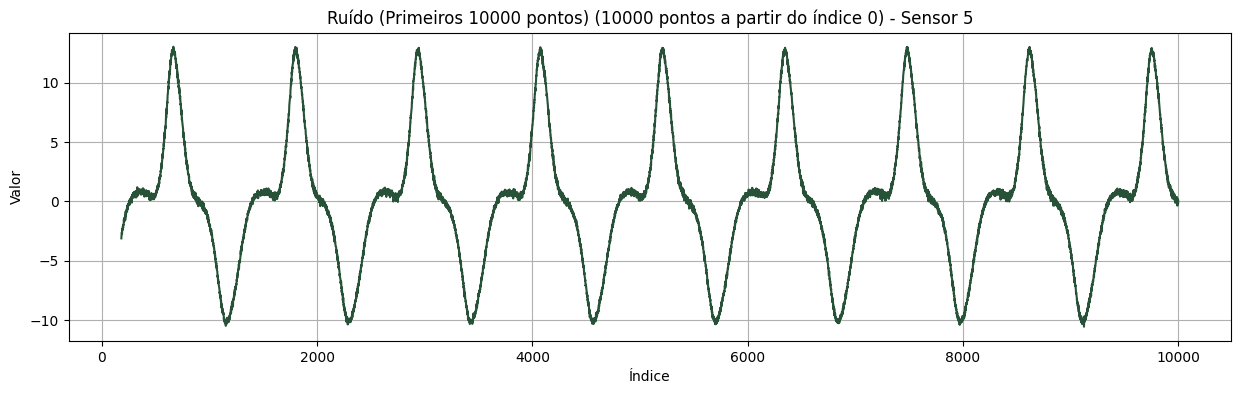

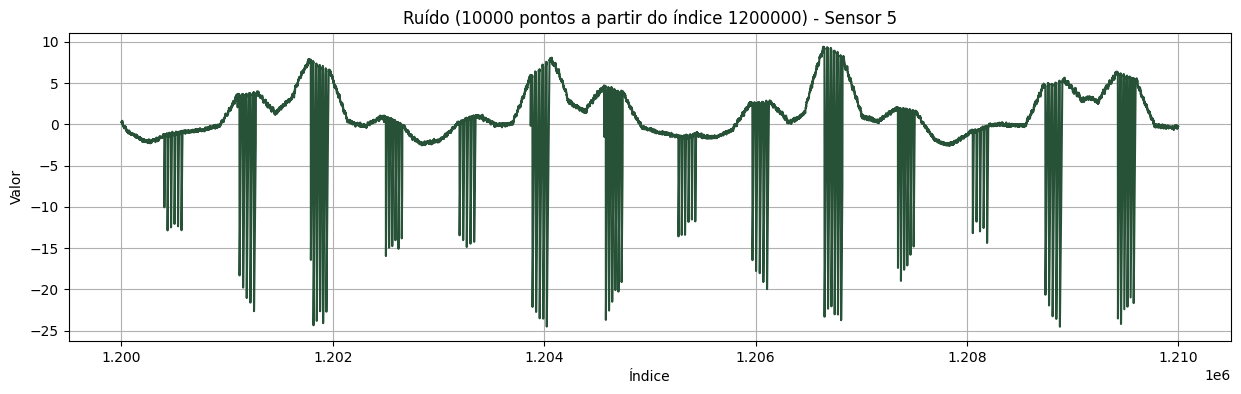

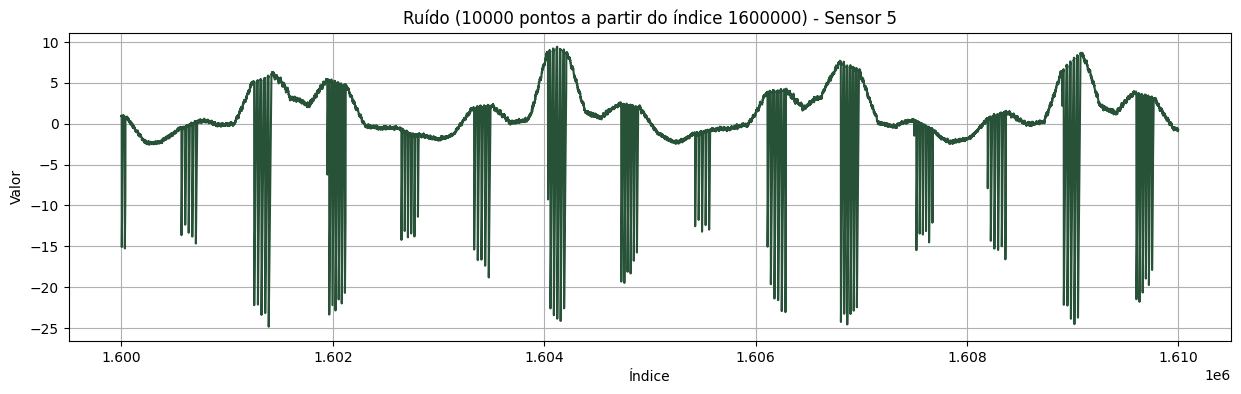

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar o ruído (resíduos) da série temporal em intervalos específicos
def plot_noise(result, indices, index_start, num_points, sensor, title_prefix="Ruído"):
    """
    Função para plotar a componente de ruído (residual) de uma decomposição sazonal.

    Parâmetros:
        result (DecomposeResult): Objeto da decomposição sazonal contendo `resid`.
        indices (array-like): Índices da série temporal.
        index_start (int): Índice inicial para a plotagem.
        num_points (int): Número de pontos a serem exibidos.
        sensor (int/str): Identificador do sensor (exibido no título).
        title_prefix (str): Prefixo do título do gráfico (ex: 'Ruído').
    """
    # Definir índice final com base no número de pontos
    max_index = len(indices)
    index_end = min(index_start + num_points, max_index)

    # Verificar se o índice inicial está dentro dos limites dos dados
    if index_start >= max_index:
        print(f"Índice {index_start} fora do limite dos dados ({max_index} pontos disponíveis).")
        return

    # Criar gráfico para o intervalo solicitado
    plt.figure(figsize=(15, 4))
    plt.plot(indices[index_start:index_end], result.resid[index_start:index_end], color='#285238')  # Cor verde escuro
    plt.title(f"{title_prefix} ({num_points} pontos a partir do índice {index_start}) - Sensor {sensor}")
    plt.ylabel('Valor')
    plt.xlabel('Índice')
    plt.grid(True)  # Adicionar grade ao gráfico
    plt.show()

# Plotando os intervalos de ruído (resíduos)
plot_noise(
    result=result,
    indices=indices,
    index_start=0,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído (Primeiros 10000 pontos)"
)

plot_noise(
    result=result,
    indices=indices,
    index_start=1200000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído"
)

plot_noise(
    result=result,
    indices=indices,
    index_start=1600000,
    num_points=10000,
    sensor=sensor,
    title_prefix="Ruído"
)



##5.4 Aplicação do Algoritmo de Detecção de Anomalias

<ipython-input-44-19afb4e10552>:67: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')


Primeiros resíduos analisados: [-3.10876465 -3.10876465 -3.10876465 -3.10876465 -3.10876465 -3.10876465
 -3.10876465 -3.10876465 -3.10876465 -3.10876465]
Pontuações de anomalia: [1.23249484 1.23249484 1.23249484 1.23249484 1.23249484 1.23249484
 1.23249484 1.23249484 1.23249484 1.23249484]
Probabilidade de anomalia: [0.77425493 0.77425493 0.77425493 0.77425493 0.77425493 0.77425493
 0.77425493 0.77425493 0.77425493 0.77425493]
Índices das anomalias detectadas: [1139322 1139323 1139324 1139325 1139326 1139327 1139328 1139329 1139330
 1139331]


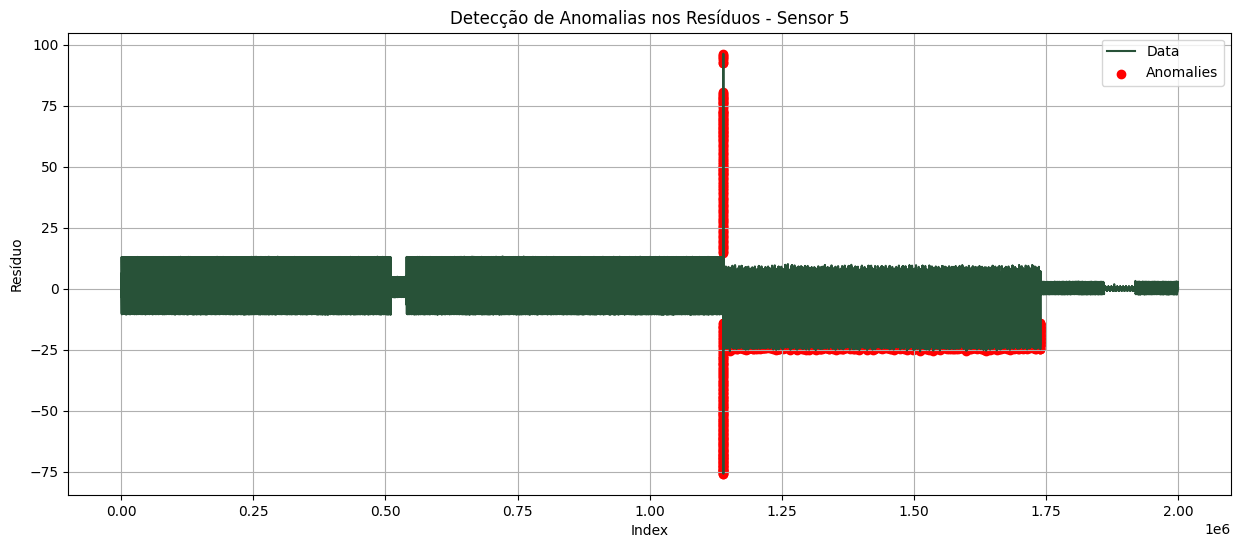

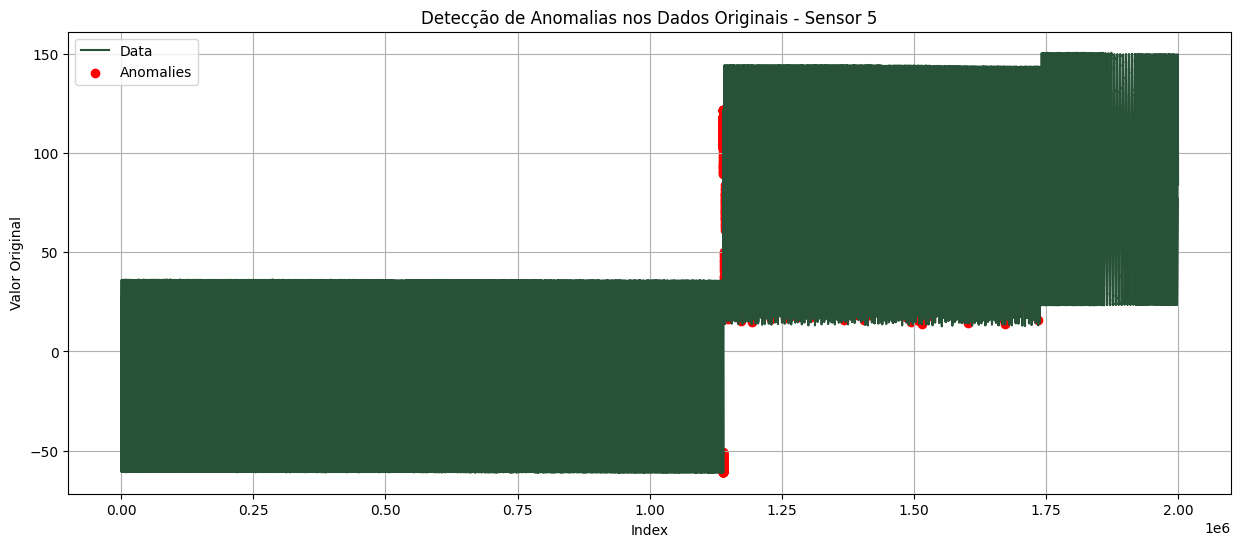

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Função sigmoide para conversão de scores em probabilidades
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Função de detecção de anomalias baseada na mediana dupla
def double_absolute_median_anomaly_detection(data, threshold=3.5):
    """
    Detecta anomalias usando um método baseado em desvios da mediana dupla.

    Parâmetros:
        data (array-like): Série temporal a ser analisada.
        threshold (float): Limiar de detecção de anomalias.

    Retorna:
        anomalies (array-like): Array booleano indicando os pontos anômalos.
        anomaly_score (array-like): Pontuação de anomalia para cada ponto.
    """
    median = np.median(data)
    first_mad_deviation = np.abs(data - median)
    second_median = np.median(first_mad_deviation)
    second_mad = np.median(np.abs(first_mad_deviation - second_median))

    # Cálculo da pontuação de anomalia normalizada
    anomaly_score = np.abs((first_mad_deviation - second_median) / (second_mad + 1e-6))

    # Classificação de anomalias
    anomalies = anomaly_score > threshold

    return anomalies, anomaly_score

# Função para plotar os dados e destacar as anomalias detectadas
def plot_anomalies(x_values, y_values, anomaly_indices, title, ylabel):
    """
    Plota os dados e destaca as anomalias detectadas.

    Parâmetros:
        x_values (array-like): Eixo X (índices).
        y_values (array-like): Eixo Y (valores da série).
        anomaly_indices (array-like): Índices das anomalias detectadas.
        title (str): Título do gráfico.
        ylabel (str): Rótulo do eixo Y.
    """
    plt.figure(figsize=(15, 6))
    plt.plot(x_values, y_values, label='Data', color='#285238')

    # Verifica se há anomalias antes de plotar
    if len(anomaly_indices) > 0:
        plt.scatter(x_values[anomaly_indices], y_values[anomaly_indices], color='red', label='Anomalies')

    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)  # Adiciona grade ao gráfico para melhor visualização
    plt.show()

# Preenchendo os valores NaN nos resíduos usando interpolação
result_resid_filled = result.resid.interpolate(method='linear')

# Garantir que todos os valores NaN foram preenchidos corretamente
if result_resid_filled.isnull().sum() > 0:
    result_resid_filled = result_resid_filled.fillna(method='bfill').fillna(method='ffill')

# Extração dos valores residuais para análise
resid_values = result_resid_filled.values

# Detecção de anomalias usando o método da mediana dupla
anomalies, anomaly_score = double_absolute_median_anomaly_detection(resid_values, threshold=3.5)

# Conversão das pontuações de anomalia em probabilidades
anomaly_probabilities = sigmoid(anomaly_score)

# Filtragem dos índices de anomalias com base na probabilidade
anomaly_indices = np.where(anomalies & (anomaly_probabilities >= 0.9999))[0]

# Exibir os primeiros resultados detectados
print("Primeiros resíduos analisados:", resid_values[:10])
print("Pontuações de anomalia:", anomaly_score[:10])
print("Probabilidade de anomalia:", anomaly_probabilities[:10])
print("Índices das anomalias detectadas:", anomaly_indices[:10])

# Verifica se há anomalias antes de tentar plotar
if len(anomaly_indices) == 0:
    print("Nenhuma anomalia detectada!")
else:
    # Plotagem dos resíduos com as anomalias detectadas
    plot_anomalies(
        x_values=np.arange(len(resid_values)),
        y_values=resid_values,
        anomaly_indices=anomaly_indices,
        title=f'Detecção de Anomalias nos Resíduos - Sensor {sensor}',
        ylabel='Resíduo'
    )

    # Plotagem dos dados originais com as anomalias detectadas
    plot_anomalies(
        x_values=np.arange(len(sensor_data_sample.values)),
        y_values=sensor_data_sample.values,
        anomaly_indices=anomaly_indices,
        title=f'Detecção de Anomalias nos Dados Originais - Sensor {sensor}',
        ylabel='Valor Original'
    )
